# Applying Temporal Convolutional Network (TCN) to time series forecasting of Well and Riser flow rates

## Author: Ridha Alkhabaz

This is notebook to explore Prophet algorithm viability to predict volume flow rates in a well. Specifically, we are investigating oil volume flow rate in this notebook. 


## Imports:

In [1]:
import os
os.chdir('/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML/src')
from preprocessing import read_data_well, multivariate_data, univariate_data, dataframe
from configuration import configure 
os.chdir("/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML")
from main import model_init, model_train, model_predict
# for tcn applications
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, RepeatVector
from tensorflow.keras.preprocessing import sequence
from tcn import TCN
import tensorflow as tf
# for data configurations
import sys
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import adjusted_rand_score
import datetime as dttm

Importing plotly failed. Interactive plots will not work.


#### Reading the data and visualization:
We use the previous operation period to predict the fifth one. We did some padding between the operation period to make sure that TCN observes the gradual trend to steady-state. 

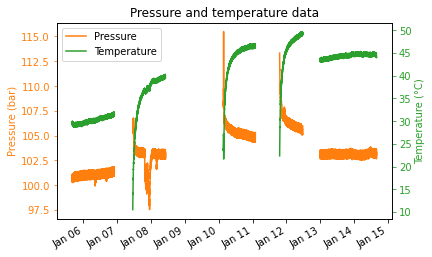

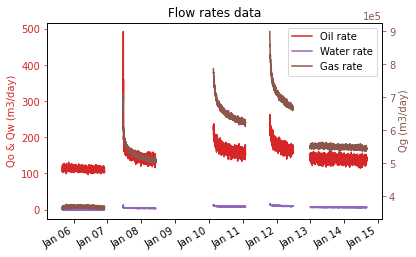

In [2]:
fp, headers, _ = read_data_well('welltest.csv', plot_data=True)
df_pd = dataframe(fp, ['ds', 'pressure', 'temperature', 'oil', 'water', 'gas'], True, True)
df = dataframe(fp, ['ds', 'pressure', 'temperature', 'oil', 'water', 'gas'], False, True)
df = df.drop(['ds'], axis=1)
df_pd = df_pd.drop(['ds'], axis=1)
### Univariate model 
train_uni_oil = np.array(df['oil'])
train_uni_oil_pd = np.array(df_pd['oil'])
## multivariate 
train_mult_oil = pd.concat([df.iloc[:, 0:2], df['oil']], axis=1)
train_mult_oil_pd = pd.concat([df_pd.iloc[:, 0:2], df_pd['oil']], axis=1)
train_mult_oil_t = pd.concat([df.iloc[:, 0:2],df['time'], df['oil'], df['oil']], axis=1)
train_mult_oil_t_pd = pd.concat([df_pd.iloc[:, 0:2],df_pd['time'], df_pd['oil'], df_pd['oil']], axis=1)
train_mult_oil_prv = pd.concat([df.iloc[:, 0:2],df['oil'], df['oil']], axis=1)
train_mult_oil_prv_pd = pd.concat([df_pd.iloc[:, 0:2],df_pd['oil'], df_pd['oil']], axis=1)
## hyperparameters for out models
basic = {'input_shape':(300,1), 'dropout_rate':0.2}
basic_mult = {'input_shape':(300,2), 'dropout_rate':0.2}
basic_mult_pst = {'input_shape':(300,3), 'dropout_rate':0.2}
basic_mult_psT = {'input_shape':(300,4), 'dropout_rate':0.2}
tuned = {'input_shape':(300,1), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8),'dropout_rate':0.2}
tuned_mult = {'input_shape':(300,2), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8),'dropout_rate':0.2}
tuned_mult_pst = {'input_shape':(300,3), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8),'dropout_rate':0.2}
tuned_mult_pstT = {'input_shape':(300,4), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8),'dropout_rate':0.2}

#### Initialization:
We are trying to find the difference between univariate, multivairate, tuned and basic implementation of TCN. 

In [3]:
tcn_oil_basic_uni_whole= model_init(model='TCN', hyperparameters=basic) 
tcn_oil_basic_uni_daily= model_init(model='TCN', hyperparameters=basic)
tcn_oil_basic_uni_daily_pd= model_init(model='TCN', hyperparameters=basic) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn (TCN)                    (None, 64)                136256    
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 136,581
Trainable params: 136,581
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_1 (TCN)                  (None, 64)                136256    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 136,581
Trainable params: 136,581
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"


In [4]:
tcn_oil_uni_tuned_whole = model_init(model='TCN', hyperparameters=tuned) 
tcn_oil_uni_tuned_daily = model_init(model='TCN', hyperparameters=tuned) 
tcn_oil_uni_tuned_daily_pd = model_init(model='TCN', hyperparameters=tuned) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_3 (TCN)                  (None, 32)                21920     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 22,085
Trainable params: 22,085
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_4 (TCN)                  (None, 32)                21920     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
Total params: 22,085
Trainable params: 22,085
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
__

In [6]:
tcn_oil_mult_basic_whole = model_init(model='TCN', hyperparameters=basic_mult) 
tcn_oil_mult_basic_daily = model_init(model='TCN', hyperparameters=basic_mult) 
tcn_oil_mult_basic_daily_pd = model_init(model='TCN', hyperparameters=basic_mult) 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_9 (TCN)                  (None, 64)                136512    
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 325       
Total params: 136,837
Trainable params: 136,837
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_10 (TCN)                 (None, 64)                136512    
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 325       
Total params: 136,837
Trainable params: 136,837
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_

In [7]:
tcn_oil_mult_basic_whole_pst = model_init(model='TCN',hyperparameters=basic_mult_pst ) 
tcn_oil_mult_basic_daily_pst= model_init(model='TCN', hyperparameters=basic_mult_pst) 
tcn_oil_mult_basic_daily_pd_pst = model_init(model='TCN', hyperparameters=basic_mult_pst) 

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_12 (TCN)                 (None, 64)                136768    
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 325       
Total params: 137,093
Trainable params: 137,093
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_13 (TCN)                 (None, 64)                136768    
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 325       
Total params: 137,093
Trainable params: 137,093
Non-trainable params: 0
_________________________________________________________________
Model: "sequential

In [8]:
tcn_oil_mult_basic_whole_pstT = model_init(model='TCN',hyperparameters=basic_mult_psT) 
tcn_oil_mult_basic_daily_pstT= model_init(model='TCN', hyperparameters=basic_mult_psT) 
tcn_oil_mult_basic_daily_pd_pstT = model_init(model='TCN', hyperparameters=basic_mult_psT) 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_15 (TCN)                 (None, 64)                137024    
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 325       
Total params: 137,349
Trainable params: 137,349
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_16 (TCN)                 (None, 64)                137024    
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 325       
Total params: 137,349
Trainable params: 137,349
Non-trainable params: 0
_________________________________________________________________
Model: "sequential

In [9]:
tcn_oil_mult_tuned_whole = model_init(model='TCN', hyperparameters=tuned_mult) 
tcn_oil_mult_tuned_daily = model_init(model='TCN', hyperparameters=tuned_mult) 
tcn_oil_mult_tuned_daily_pd = model_init(model='TCN', hyperparameters=tuned_mult) 

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_18 (TCN)                 (None, 32)                22048     
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 165       
Total params: 22,213
Trainable params: 22,213
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_19 (TCN)                 (None, 32)                22048     
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 165       
Total params: 22,213
Trainable params: 22,213
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_20"

In [10]:
tcn_oil_mult_tuned_whole_pst = model_init(model='TCN', hyperparameters=tuned_mult_pst) 
tcn_oil_mult_tuned_daily_pst = model_init(model='TCN', hyperparameters=tuned_mult_pst) 
tcn_oil_mult_tuned_daily_pd_pst = model_init(model='TCN',hyperparameters=tuned_mult_pst) 

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_21 (TCN)                 (None, 32)                22176     
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 165       
Total params: 22,341
Trainable params: 22,341
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_22 (TCN)                 (None, 32)                22176     
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 165       
Total params: 22,341
Trainable params: 22,341
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"

In [11]:
tcn_oil_mult_tuned_whole_pstT = model_init(model='TCN', hyperparameters=tuned_mult_pstT) 
tcn_oil_mult_tuned_daily_pstT = model_init(model='TCN', hyperparameters=tuned_mult_pstT) 
tcn_oil_mult_tuned_daily_pd_pstT = model_init(model='TCN', hyperparameters=tuned_mult_pstT) 

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_24 (TCN)                 (None, 32)                22304     
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 165       
Total params: 22,469
Trainable params: 22,469
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_25 (TCN)                 (None, 32)                22304     
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 165       
Total params: 22,469
Trainable params: 22,469
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_26"

#### Training:
We train our model on the training data. We train per operational period and in whole, with and without padding. 
##### Whole - No padding:

In [13]:
## Univaraiate training 
x_uni_train, y_uni_train = univariate_data(train_uni_oil, 0, 5535, 300, 5)
x_uni_test, y_uni_test = univariate_data(train_uni_oil, 5535, len(df)-10, 300, 5)
x_uni_train = x_uni_train.astype(np.float32)
y_uni_train = y_uni_train.astype(np.float32)
x_uni_test = x_uni_test.astype(np.float32)
y_uni_test = y_uni_test.astype(np.float32)
## Univaraiate training Padding 
x_uni_test_pd, y_uni_test_pd = univariate_data(train_uni_oil_pd, 10560, len(df_pd)-10, 300, 5)
x_uni_test_pd = x_uni_test_pd.astype(np.float32)
y_uni_test_pd = y_uni_test_pd.astype(np.float32)
## multivariate training -pressure and temperature readings only 
x_mult_train, y_mult_train = multivariate_data(np.array(train_mult_oil), 0,5535, 300, 5, column_index=2)
x_mult_test, y_mult_test = multivariate_data(np.array(train_mult_oil), 5535, len(df)-10, 300, 5, column_index=2)
x_mult_train = x_mult_train.astype(np.float32)
y_mult_train = y_mult_train.astype(np.float32)
x_mult_test = x_mult_test.astype(np.float32)
y_mult_test = y_mult_test.astype(np.float32)
## multivariate training -using also previous readings as well
x_mult_train_pst, y_mult_train_pst = multivariate_data(np.array(train_mult_oil_prv), 0,5535, 300, 5, column_index=3)
x_mult_test_pst, y_mult_test_pst = multivariate_data(np.array(train_mult_oil_prv), 5535, len(df)-10, 300, 5, column_index=3)
x_mult_train_pst = x_mult_train_pst.astype(np.float32)
y_mult_train_pst = y_mult_train_pst.astype(np.float32)
x_mult_test_pst = x_mult_test_pst.astype(np.float32)
y_mult_test_pst = y_mult_test_pst.astype(np.float32)
## multivariate training -using also previous increasing time as well
x_mult_train_pstT, y_mult_train_pstT = multivariate_data(np.array(train_mult_oil_t), 0,5535, 300, 5, column_index=4)
x_mult_test_pstT, y_mult_test_pstT = multivariate_data(np.array(train_mult_oil_t), 5535, len(df)-10, 300, 5, column_index=4)
x_mult_train_pstT = x_mult_train_pstT.astype(np.float32)
y_mult_train_pstT = y_mult_train_pstT.astype(np.float32)
x_mult_test_pstT = x_mult_test_pstT.astype(np.float32)
y_mult_test_pstT = y_mult_test_pstT.astype(np.float32)
## multivariate training -pressure and temperature readings only 
x_mult_test_pd, y_mult_test_pd = multivariate_data(np.array(train_mult_oil_pd), 10560, len(df_pd)-10, 300, 5, column_index=2)
x_mult_test_pd = x_mult_test_pd.astype(np.float32)
y_mult_test_pd = y_mult_test_pd.astype(np.float32)
## multivariate training -using also previous readings as well
x_mult_test_pst_pd, y_mult_test_pst_pd = multivariate_data(np.array(train_mult_oil_prv_pd), 10560, len(df_pd)-10, 300, 5, column_index=3)
x_mult_test_pst_pd = x_mult_test_pst_pd.astype(np.float32)
y_mult_test_pst_pd = y_mult_test_pst_pd.astype(np.float32)
## multivariate training -using also previous increasing time as well
x_mult_test_pstT_pd, y_mult_test_pstT_pd = multivariate_data(np.array(train_mult_oil_t_pd), 10590, len(df_pd)-1000, 300, 5, column_index=4)
x_mult_test_pstT_pd = x_mult_test_pstT_pd.astype(np.float32)
y_mult_test_pstT_pd = y_mult_test_pstT_pd.astype(np.float32)

In [14]:
history_tcn_oil_basic_uni_whole = tcn_oil_basic_uni_whole.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 11s 276ms/step - loss: 3.7821 - val_loss: 0.0073
Epoch 2/50
32/32 [==============================] - 7s 208ms/step - loss: 0.0560 - val_loss: 0.0066
Epoch 3/50
32/32 [==============================] - 6s 192ms/step - loss: 0.0402 - val_loss: 0.0035
Epoch 4/50
32/32 [==============================] - 6s 177ms/step - loss: 0.0248 - val_loss: 0.0024
Epoch 5/50
32/32 [==============================] - 6s 177ms/step - loss: 0.0229 - val_loss: 0.0024
Epoch 6/50
32/32 [==============================] - 5s 168ms/step - loss: 0.0198 - val_loss: 0.0026
Epoch 7/50
32/32 [==============================] - 5s 171ms/step - loss: 0.0159 - val_loss: 0.0040
Epoch 8/50
32/32 [==============================] - 6s 175ms/step - loss: 0.0142 - val_loss: 0.0029
Epoch 9/50
32/32 [==============================] - 6s 173ms/step - loss: 0.0156 - val_loss: 0.0027
Epoch 10/50
32/32 [==============================] - 5s 169ms/step - loss: 0.0097 - val_loss: 0.002

In [15]:
history_tcn_oil_uni_tuned_whole= tcn_oil_uni_tuned_whole.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 3s 61ms/step - loss: 0.6403 - val_loss: 0.0103
Epoch 2/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0400 - val_loss: 0.0067
Epoch 3/50
32/32 [==============================] - 2s 54ms/step - loss: 0.0230 - val_loss: 0.0030
Epoch 4/50
32/32 [==============================] - 2s 57ms/step - loss: 0.0165 - val_loss: 0.0033
Epoch 5/50
32/32 [==============================] - 2s 60ms/step - loss: 0.0126 - val_loss: 0.0027
Epoch 6/50
32/32 [==============================] - 2s 48ms/step - loss: 0.0110 - val_loss: 0.0023
Epoch 7/50
32/32 [==============================] - 2s 52ms/step - loss: 0.0091 - val_loss: 0.0031
Epoch 8/50
32/32 [==============================] - 2s 52ms/step - loss: 0.0068 - val_loss: 0.0022
Epoch 9/50
32/32 [==============================] - 2s 52ms/step - loss: 0.0061 - val_loss: 0.0029
Epoch 10/50
32/32 [==============================] - 2s 52ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 11/

In [16]:
history_tcn_oil_mult_basic_whole = tcn_oil_mult_basic_whole.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 8s 181ms/step - loss: 93.1420 - val_loss: 0.0067
Epoch 2/50
32/32 [==============================] - 6s 177ms/step - loss: 1.2700 - val_loss: 0.1517
Epoch 3/50
32/32 [==============================] - 6s 185ms/step - loss: 0.7406 - val_loss: 0.0932
Epoch 4/50
32/32 [==============================] - 6s 175ms/step - loss: 0.5095 - val_loss: 0.1245
Epoch 5/50
32/32 [==============================] - 6s 173ms/step - loss: 0.4413 - val_loss: 0.1240
Epoch 6/50
32/32 [==============================] - 6s 173ms/step - loss: 0.3905 - val_loss: 0.1444
Epoch 7/50
32/32 [==============================] - 6s 174ms/step - loss: 0.3078 - val_loss: 0.1961
Epoch 8/50
32/32 [==============================] - 6s 171ms/step - loss: 0.2886 - val_loss: 0.1542
Epoch 9/50
32/32 [==============================] - 5s 170ms/step - loss: 0.2406 - val_loss: 0.1144
Epoch 10/50
32/32 [==============================] - 5s 170ms/step - loss: 0.1971 - val_loss: 0.123

In [17]:
history_tcn_oil_mult_tuned_whole = tcn_oil_mult_tuned_whole.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 3s 63ms/step - loss: 6.1551 - val_loss: 0.0703
Epoch 2/50
32/32 [==============================] - 2s 55ms/step - loss: 0.2912 - val_loss: 0.0333
Epoch 3/50
32/32 [==============================] - 2s 56ms/step - loss: 0.1789 - val_loss: 0.0238
Epoch 4/50
32/32 [==============================] - 3s 87ms/step - loss: 0.1321 - val_loss: 0.0151
Epoch 5/50
32/32 [==============================] - 2s 55ms/step - loss: 0.1015 - val_loss: 0.0150
Epoch 6/50
32/32 [==============================] - 2s 67ms/step - loss: 0.0757 - val_loss: 0.0133
Epoch 7/50
32/32 [==============================] - 2s 59ms/step - loss: 0.0657 - val_loss: 0.0156
Epoch 8/50
32/32 [==============================] - 2s 56ms/step - loss: 0.0547 - val_loss: 0.0132
Epoch 9/50
32/32 [==============================] - 2s 58ms/step - loss: 0.0450 - val_loss: 0.0106
Epoch 10/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0393 - val_loss: 0.0099
Epoch 11/

In [18]:
history_tcn_oil_mult_basic_whole_pst = tcn_oil_mult_basic_whole_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 11s 244ms/step - loss: 59.0393 - val_loss: 0.2517
Epoch 2/50
32/32 [==============================] - 7s 214ms/step - loss: 0.7886 - val_loss: 0.0307
Epoch 3/50
32/32 [==============================] - 8s 257ms/step - loss: 0.4381 - val_loss: 0.0193
Epoch 4/50
32/32 [==============================] - 7s 217ms/step - loss: 0.3135 - val_loss: 0.0247
Epoch 5/50
32/32 [==============================] - 9s 272ms/step - loss: 0.2526 - val_loss: 0.0239
Epoch 6/50
32/32 [==============================] - 7s 229ms/step - loss: 0.1921 - val_loss: 0.0278
Epoch 7/50
32/32 [==============================] - 6s 179ms/step - loss: 0.1779 - val_loss: 0.0255
Epoch 8/50
32/32 [==============================] - 6s 179ms/step - loss: 0.1424 - val_loss: 0.0234
Epoch 9/50
32/32 [==============================] - 6s 173ms/step - loss: 0.1178 - val_loss: 0.0285
Epoch 10/50
32/32 [==============================] - 6s 171ms/step - loss: 0.1042 - val_loss: 0.02

In [19]:
history_tcn_oil_mult_tuned_whole_pst = tcn_oil_mult_tuned_whole_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 3s 68ms/step - loss: 5.2260 - val_loss: 0.0691
Epoch 2/50
32/32 [==============================] - 2s 57ms/step - loss: 0.2416 - val_loss: 0.0214
Epoch 3/50
32/32 [==============================] - 2s 61ms/step - loss: 0.1325 - val_loss: 0.0162
Epoch 4/50
32/32 [==============================] - 2s 57ms/step - loss: 0.0974 - val_loss: 0.0097
Epoch 5/50
32/32 [==============================] - 2s 57ms/step - loss: 0.0730 - val_loss: 0.0135
Epoch 6/50
32/32 [==============================] - 2s 57ms/step - loss: 0.0571 - val_loss: 0.0090
Epoch 7/50
32/32 [==============================] - 2s 67ms/step - loss: 0.0439 - val_loss: 0.0068
Epoch 8/50
32/32 [==============================] - 2s 72ms/step - loss: 0.0349 - val_loss: 0.0076
Epoch 9/50
32/32 [==============================] - 2s 58ms/step - loss: 0.0298 - val_loss: 0.0071
Epoch 10/50
32/32 [==============================] - 2s 58ms/step - loss: 0.0244 - val_loss: 0.0035
Epoch 11/

In [20]:
history_tcn_oil_mult_basic_whole_pstT = tcn_oil_mult_basic_whole_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 8s 183ms/step - loss: 765854822.7879 - val_loss: 11440505.0000
Epoch 2/50
32/32 [==============================] - 5s 169ms/step - loss: 10812766.2121 - val_loss: 1518625.0000
Epoch 3/50
32/32 [==============================] - 6s 173ms/step - loss: 6151758.7273 - val_loss: 1949875.6250
Epoch 4/50
32/32 [==============================] - 6s 172ms/step - loss: 4819766.1667 - val_loss: 2389141.0000
Epoch 5/50
32/32 [==============================] - 6s 179ms/step - loss: 3517134.5606 - val_loss: 1888704.6250
Epoch 6/50
32/32 [==============================] - 5s 169ms/step - loss: 3041757.8106 - val_loss: 1103110.0000
Epoch 7/50
32/32 [==============================] - 5s 170ms/step - loss: 2618987.3712 - val_loss: 479744.4062
Epoch 8/50
32/32 [==============================] - 5s 170ms/step - loss: 1938569.3523 - val_loss: 405512.5312
Epoch 9/50
32/32 [==============================] - 6s 175ms/step - loss: 1945213.0909 - val_loss: 227

In [21]:
history_tcn_oil_mult_tuned_whole_pstT = tcn_oil_mult_tuned_whole_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 3s 64ms/step - loss: 170311357.9394 - val_loss: 2512094.2500
Epoch 2/50
32/32 [==============================] - 2s 56ms/step - loss: 5135358.9697 - val_loss: 1206720.5000
Epoch 3/50
32/32 [==============================] - 2s 57ms/step - loss: 2907862.6970 - val_loss: 713461.6875
Epoch 4/50
32/32 [==============================] - 2s 56ms/step - loss: 2235022.4015 - val_loss: 585368.7500
Epoch 5/50
32/32 [==============================] - 2s 55ms/step - loss: 1608282.2917 - val_loss: 594332.1875
Epoch 6/50
32/32 [==============================] - 2s 54ms/step - loss: 1293879.9621 - val_loss: 804722.5625
Epoch 7/50
32/32 [==============================] - 2s 59ms/step - loss: 1142127.0568 - val_loss: 986253.1250
Epoch 8/50
32/32 [==============================] - 2s 55ms/step - loss: 1140450.9015 - val_loss: 725300.2500
Epoch 9/50
32/32 [==============================] - 2s 55ms/step - loss: 779681.6951 - val_loss: 681874.5625
Epoch 1

##### Daily - no padding

In [23]:
sumin = 0
lengths = [0]
for i in fp:
    sumin += len(i)
    lengths.append(sumin)
splits = [0, 2579, 6432, 8832, 10560]
lengths

[0, 1797, 3191, 4557, 5535, 7933]

In [24]:
for i in range(4):
    ### configuration for univariate models' training 
    x_uni_train, y_uni_train = univariate_data(train_uni_oil, lengths[i], lengths[i+1], 300, 5)
    x_uni_train = x_uni_train.astype(np.float32)
    y_uni_train = y_uni_train.astype(np.float32)
    # training the univariate models.
    print("check one")
    history_tcn_oil_basic_uni_daily = tcn_oil_basic_uni_daily.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)
    print("check two")
    history_tcn_oil_uni_tuned_daily = tcn_oil_uni_tuned_daily.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)
    ## configuration for multivariate models 
    ## multivariate training -pressure and temperature readings only 
    x_mult_train, y_mult_train = multivariate_data(np.array(train_mult_oil), lengths[i], lengths[i+1]-10, 300, 5, column_index=2)
    x_mult_train = x_mult_train.astype(np.float32)
    y_mult_train = y_mult_train.astype(np.float32)
    ## multivariate training -using also previous readings as well
    x_mult_train_pst, y_mult_train_pst = multivariate_data(np.array(train_mult_oil_prv), lengths[i], lengths[i+1]-10, 300, 5, column_index=3)
    x_mult_train_pst = x_mult_train_pst.astype(np.float32)
    y_mult_train_pst = y_mult_train_pst.astype(np.float32)
    ## multivariate training -using also previous increasing time as well
    x_mult_train_pstT, y_mult_train_pstT = multivariate_data(np.array(train_mult_oil_t), lengths[i], lengths[i+1]-10, 300, 5, column_index=4)
    x_mult_train_pstT = x_mult_train_pstT.astype(np.float32)
    y_mult_train_pstT = y_mult_train_pstT.astype(np.float32)
    # training the multivariate models 
    #### P and T
    print("check 3")
    history_tcn_oil_mult_basic_daily = tcn_oil_mult_basic_daily.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)
    print("check 4")
    history_tcn_oil_mult_tuned_daily = tcn_oil_mult_tuned_daily.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)
    #### P, T, and PST
    print("check 5")
    history_tcn_oil_mult_basic_daily_pst = tcn_oil_mult_basic_daily_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)
    print("check 6")
    history_tcn_oil_mult_tuned_daily_pst = tcn_oil_mult_tuned_daily_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)
    #### P, T, PST, and Time 
    print("check 7")
    history_tcn_oil_mult_basic_daily_pstT = tcn_oil_mult_basic_daily_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)
    print("check 8")
    history_tcn_oil_mult_tuned_daily_pstT = tcn_oil_mult_tuned_daily_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)
    print('++++++++++++++++++++++++++++++++++++++++')
    print(i)
    print('++++++++++++++++++++++++++++++++++++++++++')

check one
Epoch 1/50
9/9 [==============================] - 4s 228ms/step - loss: 0.8545 - val_loss: 0.0026
Epoch 2/50
9/9 [==============================] - 2s 242ms/step - loss: 0.0305 - val_loss: 0.0047
Epoch 3/50
9/9 [==============================] - 2s 179ms/step - loss: 0.0122 - val_loss: 0.0013
Epoch 4/50
9/9 [==============================] - 2s 179ms/step - loss: 0.0059 - val_loss: 8.2969e-04
Epoch 5/50
9/9 [==============================] - 2s 181ms/step - loss: 0.0043 - val_loss: 6.8551e-04
Epoch 6/50
9/9 [==============================] - 2s 192ms/step - loss: 0.0034 - val_loss: 5.6461e-04
Epoch 7/50
9/9 [==============================] - 2s 183ms/step - loss: 0.0032 - val_loss: 5.2588e-04
Epoch 8/50
9/9 [==============================] - 2s 189ms/step - loss: 0.0025 - val_loss: 4.8702e-04
Epoch 9/50
9/9 [==============================] - 2s 180ms/step - loss: 0.0024 - val_loss: 5.0361e-04
Epoch 10/50
9/9 [==============================] - 2s 181ms/step - loss: 0.0021 - va

9/9 [==============================] - 1s 59ms/step - loss: 7.6084e-04 - val_loss: 2.8226e-04
Epoch 30/50
9/9 [==============================] - 1s 57ms/step - loss: 7.5005e-04 - val_loss: 2.8262e-04
Epoch 31/50
9/9 [==============================] - 1s 58ms/step - loss: 7.4577e-04 - val_loss: 2.8004e-04
Epoch 32/50
9/9 [==============================] - 1s 59ms/step - loss: 6.4463e-04 - val_loss: 2.6415e-04
Epoch 33/50
9/9 [==============================] - 1s 61ms/step - loss: 6.5708e-04 - val_loss: 2.5285e-04
Epoch 34/50
9/9 [==============================] - 1s 59ms/step - loss: 6.4097e-04 - val_loss: 2.4615e-04
Epoch 35/50
9/9 [==============================] - 1s 76ms/step - loss: 6.6015e-04 - val_loss: 2.3849e-04
Epoch 36/50
9/9 [==============================] - 1s 89ms/step - loss: 6.5186e-04 - val_loss: 2.2907e-04
Epoch 37/50
9/9 [==============================] - 1s 69ms/step - loss: 5.4315e-04 - val_loss: 2.1201e-04
Epoch 38/50
9/9 [==============================] - 1s 68ms

9/9 [==============================] - 1s 58ms/step - loss: 0.2746 - val_loss: 0.0174
Epoch 11/50
9/9 [==============================] - 1s 58ms/step - loss: 0.2662 - val_loss: 0.0139
Epoch 12/50
9/9 [==============================] - 1s 59ms/step - loss: 0.2510 - val_loss: 0.0122
Epoch 13/50
9/9 [==============================] - 1s 59ms/step - loss: 0.2045 - val_loss: 0.0116
Epoch 14/50
9/9 [==============================] - 1s 56ms/step - loss: 0.2122 - val_loss: 0.0147
Epoch 15/50
9/9 [==============================] - 1s 55ms/step - loss: 0.2192 - val_loss: 0.0165
Epoch 16/50
9/9 [==============================] - 1s 58ms/step - loss: 0.1904 - val_loss: 0.0162
Epoch 17/50
9/9 [==============================] - 1s 67ms/step - loss: 0.1610 - val_loss: 0.0177
Epoch 18/50
9/9 [==============================] - 1s 59ms/step - loss: 0.1553 - val_loss: 0.0190
Epoch 19/50
9/9 [==============================] - 1s 57ms/step - loss: 0.1473 - val_loss: 0.0169
Epoch 20/50
9/9 [===============

9/9 [==============================] - 2s 181ms/step - loss: 0.0198 - val_loss: 0.0012
Epoch 44/50
9/9 [==============================] - 2s 175ms/step - loss: 0.0176 - val_loss: 0.0015
Epoch 45/50
9/9 [==============================] - 2s 175ms/step - loss: 0.0173 - val_loss: 0.0011
Epoch 46/50
9/9 [==============================] - 2s 176ms/step - loss: 0.0162 - val_loss: 9.9920e-04
Epoch 47/50
9/9 [==============================] - 2s 176ms/step - loss: 0.0168 - val_loss: 0.0012
Epoch 48/50
9/9 [==============================] - 2s 180ms/step - loss: 0.0171 - val_loss: 0.0013
Epoch 49/50
9/9 [==============================] - 2s 193ms/step - loss: 0.0174 - val_loss: 9.1551e-04
Epoch 50/50
9/9 [==============================] - 2s 176ms/step - loss: 0.0149 - val_loss: 7.2112e-04
check 6
Epoch 1/50
9/9 [==============================] - 2s 94ms/step - loss: 5.6839 - val_loss: 0.1769
Epoch 2/50
9/9 [==============================] - 1s 61ms/step - loss: 0.7018 - val_loss: 0.0362
Epoch 

Epoch 24/50
9/9 [==============================] - 2s 176ms/step - loss: 412310.1219 - val_loss: 53495.2148
Epoch 25/50
9/9 [==============================] - 2s 185ms/step - loss: 348675.8187 - val_loss: 48115.6680
Epoch 26/50
9/9 [==============================] - 2s 192ms/step - loss: 448283.3937 - val_loss: 43467.1406
Epoch 27/50
9/9 [==============================] - 2s 205ms/step - loss: 341806.4156 - val_loss: 32709.6680
Epoch 28/50
9/9 [==============================] - 2s 182ms/step - loss: 358734.0969 - val_loss: 34411.0078
Epoch 29/50
9/9 [==============================] - 2s 180ms/step - loss: 328922.9562 - val_loss: 38348.6211
Epoch 30/50
9/9 [==============================] - 2s 176ms/step - loss: 340717.0281 - val_loss: 26257.7129
Epoch 31/50
9/9 [==============================] - 2s 176ms/step - loss: 328962.3719 - val_loss: 24890.1562
Epoch 32/50
9/9 [==============================] - 2s 179ms/step - loss: 347235.6000 - val_loss: 20565.3047
Epoch 33/50
9/9 [===========

9/9 [==============================] - 1s 60ms/step - loss: 64074.4133 - val_loss: 13495.1885
++++++++++++++++++++++++++++++++++++++++
0
++++++++++++++++++++++++++++++++++++++++++
check one
Epoch 1/50
7/7 [==============================] - 1s 218ms/step - loss: 0.0058 - val_loss: 0.0012
Epoch 2/50
7/7 [==============================] - 1s 169ms/step - loss: 0.0046 - val_loss: 0.0012
Epoch 3/50
7/7 [==============================] - 1s 175ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 4/50
7/7 [==============================] - 1s 168ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 5/50
7/7 [==============================] - 1s 168ms/step - loss: 0.0030 - val_loss: 9.6296e-04
Epoch 6/50
7/7 [==============================] - 1s 169ms/step - loss: 0.0028 - val_loss: 9.1569e-04
Epoch 7/50
7/7 [==============================] - 1s 169ms/step - loss: 0.0023 - val_loss: 8.7228e-04
Epoch 8/50
7/7 [==============================] - 1s 168ms/step - loss: 0.0025 - val_loss: 7.7593e-04
Epoch 9/50

7/7 [==============================] - 0s 58ms/step - loss: 9.4188e-04 - val_loss: 4.6519e-04
Epoch 29/50
7/7 [==============================] - 0s 58ms/step - loss: 8.8497e-04 - val_loss: 4.4347e-04
Epoch 30/50
7/7 [==============================] - 0s 56ms/step - loss: 9.4245e-04 - val_loss: 4.2680e-04
Epoch 31/50
7/7 [==============================] - 0s 55ms/step - loss: 9.0448e-04 - val_loss: 4.3465e-04
Epoch 32/50
7/7 [==============================] - 0s 59ms/step - loss: 8.2133e-04 - val_loss: 4.3726e-04
Epoch 33/50
7/7 [==============================] - 0s 58ms/step - loss: 8.7511e-04 - val_loss: 4.4151e-04
Epoch 34/50
7/7 [==============================] - 0s 56ms/step - loss: 8.3248e-04 - val_loss: 4.4099e-04
Epoch 35/50
7/7 [==============================] - 0s 58ms/step - loss: 7.1723e-04 - val_loss: 4.4217e-04
Epoch 36/50
7/7 [==============================] - 0s 58ms/step - loss: 7.4485e-04 - val_loss: 4.4097e-04
Epoch 37/50
7/7 [==============================] - 0s 62ms

7/7 [==============================] - 0s 56ms/step - loss: 0.0726 - val_loss: 0.0070
Epoch 8/50
7/7 [==============================] - 0s 54ms/step - loss: 0.0664 - val_loss: 0.0073
Epoch 9/50
7/7 [==============================] - 0s 57ms/step - loss: 0.0598 - val_loss: 0.0061
Epoch 10/50
7/7 [==============================] - 0s 55ms/step - loss: 0.0657 - val_loss: 0.0087
Epoch 11/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0584 - val_loss: 0.0064
Epoch 12/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0523 - val_loss: 0.0063
Epoch 13/50
7/7 [==============================] - 0s 55ms/step - loss: 0.0481 - val_loss: 0.0088
Epoch 14/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0483 - val_loss: 0.0057
Epoch 15/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0495 - val_loss: 0.0043
Epoch 16/50
7/7 [==============================] - 0s 57ms/step - loss: 0.0451 - val_loss: 0.0034
Epoch 17/50
7/7 [=================

Epoch 40/50
7/7 [==============================] - 1s 175ms/step - loss: 0.0062 - val_loss: 0.0011
Epoch 41/50
7/7 [==============================] - 1s 168ms/step - loss: 0.0064 - val_loss: 9.0056e-04
Epoch 42/50
7/7 [==============================] - 1s 184ms/step - loss: 0.0079 - val_loss: 6.9476e-04
Epoch 43/50
7/7 [==============================] - 1s 174ms/step - loss: 0.0073 - val_loss: 7.5718e-04
Epoch 44/50
7/7 [==============================] - 1s 182ms/step - loss: 0.0077 - val_loss: 7.6294e-04
Epoch 45/50
7/7 [==============================] - 1s 186ms/step - loss: 0.0058 - val_loss: 7.7721e-04
Epoch 46/50
7/7 [==============================] - 1s 169ms/step - loss: 0.0057 - val_loss: 9.2007e-04
Epoch 47/50
7/7 [==============================] - 1s 214ms/step - loss: 0.0066 - val_loss: 7.7003e-04
Epoch 48/50
7/7 [==============================] - 1s 169ms/step - loss: 0.0065 - val_loss: 7.6890e-04
Epoch 49/50
7/7 [==============================] - 1s 167ms/step - loss: 0.00

7/7 [==============================] - 1s 166ms/step - loss: 416212.5938 - val_loss: 32146.5508
Epoch 21/50
7/7 [==============================] - 1s 164ms/step - loss: 402522.5000 - val_loss: 30742.2988
Epoch 22/50
7/7 [==============================] - 1s 162ms/step - loss: 446847.0000 - val_loss: 27618.5391
Epoch 23/50
7/7 [==============================] - 1s 164ms/step - loss: 409310.9062 - val_loss: 24497.8418
Epoch 24/50
7/7 [==============================] - 1s 165ms/step - loss: 394860.0312 - val_loss: 32521.2832
Epoch 25/50
7/7 [==============================] - 1s 164ms/step - loss: 348853.9375 - val_loss: 25924.9082
Epoch 26/50
7/7 [==============================] - 1s 179ms/step - loss: 343021.5938 - val_loss: 17180.0176
Epoch 27/50
7/7 [==============================] - 1s 169ms/step - loss: 392205.8750 - val_loss: 21508.2852
Epoch 28/50
7/7 [==============================] - 1s 167ms/step - loss: 337121.9062 - val_loss: 27593.9805
Epoch 29/50
7/7 [=======================

7/7 [==============================] - 0s 57ms/step - loss: 48693.7148 - val_loss: 5885.8394
Epoch 47/50
7/7 [==============================] - 0s 58ms/step - loss: 43277.7539 - val_loss: 5578.6313
Epoch 48/50
7/7 [==============================] - 0s 58ms/step - loss: 39291.9570 - val_loss: 6132.1299
Epoch 49/50
7/7 [==============================] - 0s 64ms/step - loss: 41969.7656 - val_loss: 7841.9375
Epoch 50/50
7/7 [==============================] - 0s 61ms/step - loss: 38509.1250 - val_loss: 6624.1230
++++++++++++++++++++++++++++++++++++++++
1
++++++++++++++++++++++++++++++++++++++++++
check one
Epoch 1/50
7/7 [==============================] - 1s 169ms/step - loss: 0.0017 - val_loss: 4.2795e-04
Epoch 2/50
7/7 [==============================] - 1s 171ms/step - loss: 0.0016 - val_loss: 6.4980e-04
Epoch 3/50
7/7 [==============================] - 1s 161ms/step - loss: 0.0016 - val_loss: 4.7796e-04
Epoch 4/50
7/7 [==============================] - 1s 162ms/step - loss: 0.0013 - val_

7/7 [==============================] - 0s 57ms/step - loss: 7.8806e-04 - val_loss: 4.7344e-04
Epoch 24/50
7/7 [==============================] - 0s 57ms/step - loss: 9.2885e-04 - val_loss: 4.7786e-04
Epoch 25/50
7/7 [==============================] - 0s 57ms/step - loss: 8.0543e-04 - val_loss: 4.8567e-04
Epoch 26/50
7/7 [==============================] - 0s 56ms/step - loss: 8.4099e-04 - val_loss: 4.8611e-04
Epoch 27/50
7/7 [==============================] - 0s 55ms/step - loss: 7.4861e-04 - val_loss: 4.7991e-04
Epoch 28/50
7/7 [==============================] - 0s 57ms/step - loss: 7.9114e-04 - val_loss: 4.7797e-04
Epoch 29/50
7/7 [==============================] - 0s 55ms/step - loss: 7.5749e-04 - val_loss: 4.7795e-04
Epoch 30/50
7/7 [==============================] - 0s 54ms/step - loss: 7.0871e-04 - val_loss: 4.7651e-04
Epoch 31/50
7/7 [==============================] - 0s 56ms/step - loss: 8.1842e-04 - val_loss: 4.6851e-04
Epoch 32/50
7/7 [==============================] - 0s 57ms

Epoch 4/50
7/7 [==============================] - 0s 54ms/step - loss: 0.0273 - val_loss: 0.0030
Epoch 5/50
7/7 [==============================] - 0s 59ms/step - loss: 0.0315 - val_loss: 0.0030
Epoch 6/50
7/7 [==============================] - 0s 59ms/step - loss: 0.0339 - val_loss: 0.0029
Epoch 7/50
7/7 [==============================] - 0s 57ms/step - loss: 0.0298 - val_loss: 0.0024
Epoch 8/50
7/7 [==============================] - 0s 61ms/step - loss: 0.0274 - val_loss: 0.0022
Epoch 9/50
7/7 [==============================] - 0s 59ms/step - loss: 0.0268 - val_loss: 0.0025
Epoch 10/50
7/7 [==============================] - 0s 55ms/step - loss: 0.0269 - val_loss: 0.0024
Epoch 11/50
7/7 [==============================] - 0s 53ms/step - loss: 0.0291 - val_loss: 0.0024
Epoch 12/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0242 - val_loss: 0.0023
Epoch 13/50
7/7 [==============================] - 0s 54ms/step - loss: 0.0219 - val_loss: 0.0022
Epoch 14/50
7/7 [=========

7/7 [==============================] - 1s 169ms/step - loss: 0.0060 - val_loss: 9.9736e-04
Epoch 38/50
7/7 [==============================] - 1s 164ms/step - loss: 0.0057 - val_loss: 0.0010
Epoch 39/50
7/7 [==============================] - 1s 165ms/step - loss: 0.0068 - val_loss: 9.1120e-04
Epoch 40/50
7/7 [==============================] - 1s 162ms/step - loss: 0.0049 - val_loss: 8.9770e-04
Epoch 41/50
7/7 [==============================] - 1s 179ms/step - loss: 0.0067 - val_loss: 0.0011
Epoch 42/50
7/7 [==============================] - 1s 172ms/step - loss: 0.0059 - val_loss: 0.0012
Epoch 43/50
7/7 [==============================] - 1s 164ms/step - loss: 0.0066 - val_loss: 0.0014
Epoch 44/50
7/7 [==============================] - 1s 164ms/step - loss: 0.0066 - val_loss: 9.1994e-04
Epoch 45/50
7/7 [==============================] - 1s 164ms/step - loss: 0.0052 - val_loss: 0.0010
Epoch 46/50
7/7 [==============================] - 1s 172ms/step - loss: 0.0072 - val_loss: 0.0013
Epoch 

7/7 [==============================] - 1s 163ms/step - loss: 249462.9844 - val_loss: 14334.3750
Epoch 18/50
7/7 [==============================] - 1s 168ms/step - loss: 237054.3438 - val_loss: 22491.3066
Epoch 19/50
7/7 [==============================] - 1s 202ms/step - loss: 238417.7500 - val_loss: 16122.5117
Epoch 20/50
7/7 [==============================] - 1s 191ms/step - loss: 200517.2344 - val_loss: 19122.3301
Epoch 21/50
7/7 [==============================] - 1s 190ms/step - loss: 192763.8438 - val_loss: 26399.1426
Epoch 22/50
7/7 [==============================] - 1s 185ms/step - loss: 233912.2969 - val_loss: 21132.4121
Epoch 23/50
7/7 [==============================] - 1s 181ms/step - loss: 187285.2188 - val_loss: 16895.5918
Epoch 24/50
7/7 [==============================] - 1s 171ms/step - loss: 178529.7188 - val_loss: 16847.9883
Epoch 25/50
7/7 [==============================] - 1s 164ms/step - loss: 211868.0000 - val_loss: 23580.5332
Epoch 26/50
7/7 [=======================

Epoch 44/50
7/7 [==============================] - 0s 56ms/step - loss: 16391.7773 - val_loss: 10903.4570
Epoch 45/50
7/7 [==============================] - 0s 57ms/step - loss: 16315.1914 - val_loss: 4123.7856
Epoch 46/50
7/7 [==============================] - 0s 55ms/step - loss: 16264.4404 - val_loss: 6705.6685
Epoch 47/50
7/7 [==============================] - 0s 61ms/step - loss: 13424.7695 - val_loss: 7743.7480
Epoch 48/50
7/7 [==============================] - 0s 55ms/step - loss: 13346.1592 - val_loss: 5814.3872
Epoch 49/50
7/7 [==============================] - 0s 56ms/step - loss: 12496.1875 - val_loss: 4084.7664
Epoch 50/50
7/7 [==============================] - 0s 57ms/step - loss: 15259.0449 - val_loss: 4214.9800
++++++++++++++++++++++++++++++++++++++++
2
++++++++++++++++++++++++++++++++++++++++++
check one
Epoch 1/50
4/4 [==============================] - 2s 305ms/step - loss: 9.7592e-04 - val_loss: 2.6436e-04
Epoch 2/50
4/4 [==============================] - 1s 199ms/ste

4/4 [==============================] - 0s 65ms/step - loss: 6.7946e-04 - val_loss: 3.3305e-04
Epoch 21/50
4/4 [==============================] - 0s 70ms/step - loss: 8.0385e-04 - val_loss: 3.3362e-04
Epoch 22/50
4/4 [==============================] - 0s 68ms/step - loss: 8.0981e-04 - val_loss: 3.3896e-04
Epoch 23/50
4/4 [==============================] - 0s 67ms/step - loss: 7.8870e-04 - val_loss: 3.5327e-04
Epoch 24/50
4/4 [==============================] - 0s 69ms/step - loss: 8.3489e-04 - val_loss: 3.5463e-04
Epoch 25/50
4/4 [==============================] - 0s 69ms/step - loss: 8.0959e-04 - val_loss: 3.4152e-04
Epoch 26/50
4/4 [==============================] - 0s 68ms/step - loss: 7.6663e-04 - val_loss: 3.3820e-04
Epoch 27/50
4/4 [==============================] - 0s 65ms/step - loss: 7.2390e-04 - val_loss: 3.3998e-04
Epoch 28/50
4/4 [==============================] - 0s 62ms/step - loss: 9.1267e-04 - val_loss: 3.4712e-04
Epoch 29/50
4/4 [==============================] - 0s 66ms

4/4 [==============================] - 1s 199ms/step - loss: 0.0027 - val_loss: 8.9445e-04
check 4
Epoch 1/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0147 - val_loss: 0.0034
Epoch 2/50
4/4 [==============================] - 0s 68ms/step - loss: 0.0158 - val_loss: 0.0029
Epoch 3/50
4/4 [==============================] - 0s 67ms/step - loss: 0.0158 - val_loss: 0.0026
Epoch 4/50
4/4 [==============================] - 0s 65ms/step - loss: 0.0145 - val_loss: 0.0024
Epoch 5/50
4/4 [==============================] - 0s 67ms/step - loss: 0.0135 - val_loss: 0.0024
Epoch 6/50
4/4 [==============================] - 0s 66ms/step - loss: 0.0148 - val_loss: 0.0024
Epoch 7/50
4/4 [==============================] - 0s 67ms/step - loss: 0.0114 - val_loss: 0.0026
Epoch 8/50
4/4 [==============================] - 0s 68ms/step - loss: 0.0139 - val_loss: 0.0029
Epoch 9/50
4/4 [==============================] - 0s 68ms/step - loss: 0.0156 - val_loss: 0.0029
Epoch 10/50
4/4 [===========

4/4 [==============================] - 1s 194ms/step - loss: 0.0049 - val_loss: 0.0011
Epoch 34/50
4/4 [==============================] - 1s 191ms/step - loss: 0.0060 - val_loss: 0.0011
Epoch 35/50
4/4 [==============================] - 1s 186ms/step - loss: 0.0054 - val_loss: 0.0011
Epoch 36/50
4/4 [==============================] - 1s 188ms/step - loss: 0.0039 - val_loss: 0.0011
Epoch 37/50
4/4 [==============================] - 1s 193ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 38/50
4/4 [==============================] - 1s 188ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 39/50
4/4 [==============================] - 1s 194ms/step - loss: 0.0051 - val_loss: 9.6680e-04
Epoch 40/50
4/4 [==============================] - 1s 223ms/step - loss: 0.0051 - val_loss: 9.2470e-04
Epoch 41/50
4/4 [==============================] - 1s 188ms/step - loss: 0.0053 - val_loss: 9.6932e-04
Epoch 42/50
4/4 [==============================] - 1s 192ms/step - loss: 0.0054 - val_loss: 9.6138e-04
Epoch 

4/4 [==============================] - 1s 192ms/step - loss: 149318.5000 - val_loss: 18542.8086
Epoch 15/50
4/4 [==============================] - 1s 191ms/step - loss: 131760.4531 - val_loss: 31651.6113
Epoch 16/50
4/4 [==============================] - 1s 194ms/step - loss: 117500.6016 - val_loss: 32231.6738
Epoch 17/50
4/4 [==============================] - 1s 189ms/step - loss: 171485.1094 - val_loss: 15960.1953
Epoch 18/50
4/4 [==============================] - 1s 188ms/step - loss: 136217.2344 - val_loss: 20289.8633
Epoch 19/50
4/4 [==============================] - 1s 190ms/step - loss: 111052.6641 - val_loss: 19267.4941
Epoch 20/50
4/4 [==============================] - 1s 189ms/step - loss: 139165.4375 - val_loss: 19308.3398
Epoch 21/50
4/4 [==============================] - 1s 192ms/step - loss: 135781.5469 - val_loss: 24980.3848
Epoch 22/50
4/4 [==============================] - 1s 195ms/step - loss: 132770.4375 - val_loss: 21050.3438
Epoch 23/50
4/4 [=======================

4/4 [==============================] - 0s 72ms/step - loss: 11218.7012 - val_loss: 3052.2083
Epoch 42/50
4/4 [==============================] - 0s 65ms/step - loss: 13004.5508 - val_loss: 2195.8999
Epoch 43/50
4/4 [==============================] - 0s 71ms/step - loss: 13033.4209 - val_loss: 1251.5653
Epoch 44/50
4/4 [==============================] - 0s 68ms/step - loss: 13817.4521 - val_loss: 1638.0665
Epoch 45/50
4/4 [==============================] - 0s 72ms/step - loss: 14532.0566 - val_loss: 1837.6897
Epoch 46/50
4/4 [==============================] - 0s 72ms/step - loss: 10745.0381 - val_loss: 1581.4764
Epoch 47/50
4/4 [==============================] - 0s 73ms/step - loss: 10173.0254 - val_loss: 1654.8474
Epoch 48/50
4/4 [==============================] - 0s 74ms/step - loss: 9316.7539 - val_loss: 2122.8142
Epoch 49/50
4/4 [==============================] - 0s 80ms/step - loss: 9714.9473 - val_loss: 2063.7375
Epoch 50/50
4/4 [==============================] - 0s 70ms/step - los

##### Daily With padding 

In [26]:
for i in range(4):
    print(i)
    ### configuration for univariate models' training 
    x_uni_train_pd, y_uni_train_pd = univariate_data(train_uni_oil_pd, splits[i], splits[i+1], 300, 5)
    x_uni_train_pd = x_uni_train_pd.astype(np.float32)
    y_uni_train_pd = y_uni_train_pd.astype(np.float32)
    # training the univariate models.
    print("check one")
    history_tcn_oil_basic_uni_daily_pd = tcn_oil_basic_uni_daily_pd.fit(x_uni_train_pd, y_uni_train_pd, epochs=50, validation_split=0.05)
    print("check two")
    history_tcn_oil_uni_tuned_daily_pd = tcn_oil_uni_tuned_daily_pd.fit(x_uni_train_pd, y_uni_train_pd, epochs=50, validation_split=0.05)
    ## configuration for multivariate models 
    ## multivariate training -pressure and temperature readings only 
    x_mult_train_pd, y_mult_train_pd = multivariate_data(np.array(train_mult_oil_pd), splits[i], splits[i+1], 300, 5, column_index=2)
    x_mult_train_pd = x_mult_train_pd.astype(np.float32)
    y_mult_train_pd = y_mult_train_pd.astype(np.float32)
    ## multivariate training -using also previous readings as well
    x_mult_train_pst_pd, y_mult_train_pst_pd = multivariate_data(np.array(train_mult_oil_prv_pd), splits[i], splits[i+1], 300, 5, column_index=3)
    x_mult_train_pst_pd = x_mult_train_pst_pd.astype(np.float32)
    y_mult_train_pst_pd = y_mult_train_pst_pd.astype(np.float32)
    ## multivariate training -using also previous increasing time as well
    x_mult_train_pstT_pd, y_mult_train_pstT_pd = multivariate_data(np.array(train_mult_oil_t_pd), splits[i], splits[i+1], 300, 5, column_index=4)
    x_mult_train_pstT_pd = x_mult_train_pstT_pd.astype(np.float32)
    y_mult_train_pstT_pd = y_mult_train_pstT_pd.astype(np.float32)
    # training the multivariate models 
    #### P and T
    print("check 3")
    history_tcn_oil_mult_basic_daily_pd = tcn_oil_mult_basic_daily_pd.fit(x_mult_train_pd, y_mult_train_pd, epochs=50, validation_split=0.05)
    print("check 4")
    history_tcn_oil_mult_tuned_daily_pd = tcn_oil_mult_tuned_daily_pd.fit(x_mult_train_pd, y_mult_train_pd, epochs=50, validation_split=0.05)
    #### P, T, and PST
    print("check 5")
    history_tcn_oil_mult_basic_daily_pd_pst = tcn_oil_mult_basic_daily_pd_pst.fit(x_mult_train_pst_pd, y_mult_train_pst_pd, epochs=50, validation_split=0.05)
    print("check 6")
    history_tcn_oil_mult_tuned_daily_pd_pst = tcn_oil_mult_tuned_daily_pd_pst.fit(x_mult_train_pst_pd, y_mult_train_pst_pd, epochs=50, validation_split=0.05)
    #### P, T, PST, and Time 
    print("check 7")
    history_tcn_oil_mult_basic_daily_pd_pstT = tcn_oil_mult_basic_daily_pd_pstT.fit(x_mult_train_pstT_pd, y_mult_train_pstT_pd, epochs=50, validation_split=0.05)
    print("check 8")
    history_tcn_oil_mult_tuned_daily_pd_pstT = tcn_oil_mult_tuned_daily_pd_pstT.fit(x_mult_train_pstT_pd, y_mult_train_pstT_pd, epochs=50, validation_split=0.05)
    print('++++++++++++++++++++++++++++++++++++++++')
    print(i)
    print('++++++++++++++++++++++++++++++++++++++++++')

0
check one
Epoch 1/50
14/14 [==============================] - 3s 177ms/step - loss: 0.0024 - val_loss: 1.4648e-04
Epoch 2/50
14/14 [==============================] - 2s 176ms/step - loss: 0.0023 - val_loss: 1.0634e-04
Epoch 3/50
14/14 [==============================] - 2s 176ms/step - loss: 0.0020 - val_loss: 8.0330e-05
Epoch 4/50
14/14 [==============================] - 2s 175ms/step - loss: 0.0016 - val_loss: 1.2033e-04
Epoch 5/50
14/14 [==============================] - 3s 187ms/step - loss: 0.0016 - val_loss: 1.3969e-04
Epoch 6/50
14/14 [==============================] - 3s 179ms/step - loss: 0.0013 - val_loss: 8.4408e-05
Epoch 7/50
14/14 [==============================] - 3s 181ms/step - loss: 0.0013 - val_loss: 4.9175e-05
Epoch 8/50
14/14 [==============================] - 2s 176ms/step - loss: 0.0011 - val_loss: 3.2564e-05
Epoch 9/50
14/14 [==============================] - 2s 177ms/step - loss: 9.2913e-04 - val_loss: 4.2149e-05
Epoch 10/50
14/14 [=============================

Epoch 27/50
14/14 [==============================] - 1s 58ms/step - loss: 1.7402e-04 - val_loss: 3.5128e-05
Epoch 28/50
14/14 [==============================] - 1s 57ms/step - loss: 1.6897e-04 - val_loss: 3.6711e-05
Epoch 29/50
14/14 [==============================] - 1s 58ms/step - loss: 1.5922e-04 - val_loss: 3.2544e-05
Epoch 30/50
14/14 [==============================] - 1s 57ms/step - loss: 1.6118e-04 - val_loss: 3.3012e-05
Epoch 31/50
14/14 [==============================] - 1s 58ms/step - loss: 1.6130e-04 - val_loss: 3.6258e-05
Epoch 32/50
14/14 [==============================] - 1s 58ms/step - loss: 1.6285e-04 - val_loss: 3.8045e-05
Epoch 33/50
14/14 [==============================] - 1s 58ms/step - loss: 1.7549e-04 - val_loss: 3.7781e-05
Epoch 34/50
14/14 [==============================] - 1s 59ms/step - loss: 1.6060e-04 - val_loss: 3.3242e-05
Epoch 35/50
14/14 [==============================] - 1s 72ms/step - loss: 1.6751e-04 - val_loss: 3.6607e-05
Epoch 36/50
14/14 [=========

14/14 [==============================] - 1s 51ms/step - loss: 0.0529 - val_loss: 0.0024
Epoch 7/50
14/14 [==============================] - 1s 55ms/step - loss: 0.0405 - val_loss: 0.0025
Epoch 8/50
14/14 [==============================] - 1s 55ms/step - loss: 0.0389 - val_loss: 0.0038
Epoch 9/50
14/14 [==============================] - 1s 55ms/step - loss: 0.0338 - val_loss: 0.0022
Epoch 10/50
14/14 [==============================] - 1s 54ms/step - loss: 0.0311 - val_loss: 0.0017
Epoch 11/50
14/14 [==============================] - 1s 54ms/step - loss: 0.0280 - val_loss: 0.0024
Epoch 12/50
14/14 [==============================] - 1s 54ms/step - loss: 0.0233 - val_loss: 0.0021
Epoch 13/50
14/14 [==============================] - 1s 53ms/step - loss: 0.0213 - val_loss: 0.0025
Epoch 14/50
14/14 [==============================] - 1s 56ms/step - loss: 0.0191 - val_loss: 0.0018
Epoch 15/50
14/14 [==============================] - 1s 54ms/step - loss: 0.0157 - val_loss: 0.0018
Epoch 16/50
14/

14/14 [==============================] - 3s 189ms/step - loss: 0.0249 - val_loss: 0.0047
Epoch 38/50
14/14 [==============================] - 2s 177ms/step - loss: 0.0260 - val_loss: 0.0050
Epoch 39/50
14/14 [==============================] - 2s 172ms/step - loss: 0.0250 - val_loss: 0.0046
Epoch 40/50
14/14 [==============================] - 2s 170ms/step - loss: 0.0242 - val_loss: 0.0041
Epoch 41/50
14/14 [==============================] - 2s 170ms/step - loss: 0.0242 - val_loss: 0.0037
Epoch 42/50
14/14 [==============================] - 2s 173ms/step - loss: 0.0228 - val_loss: 0.0036
Epoch 43/50
14/14 [==============================] - 2s 178ms/step - loss: 0.0199 - val_loss: 0.0037
Epoch 44/50
14/14 [==============================] - 2s 170ms/step - loss: 0.0188 - val_loss: 0.0032
Epoch 45/50
14/14 [==============================] - 2s 167ms/step - loss: 0.0181 - val_loss: 0.0030
Epoch 46/50
14/14 [==============================] - 2s 165ms/step - loss: 0.0182 - val_loss: 0.0030
Ep

Epoch 17/50
14/14 [==============================] - 3s 183ms/step - loss: 409777.1063 - val_loss: 90630.4219
Epoch 18/50
14/14 [==============================] - 2s 167ms/step - loss: 335737.1375 - val_loss: 127590.7422
Epoch 19/50
14/14 [==============================] - 2s 165ms/step - loss: 382919.8937 - val_loss: 114874.9141
Epoch 20/50
14/14 [==============================] - 2s 166ms/step - loss: 382682.2396 - val_loss: 90325.8984
Epoch 21/50
14/14 [==============================] - 2s 165ms/step - loss: 346885.5042 - val_loss: 129700.3516
Epoch 22/50
14/14 [==============================] - 2s 166ms/step - loss: 326021.1417 - val_loss: 117121.7969
Epoch 23/50
14/14 [==============================] - 2s 167ms/step - loss: 322854.5917 - val_loss: 131649.2031
Epoch 24/50
14/14 [==============================] - 2s 165ms/step - loss: 310772.3667 - val_loss: 93765.4141
Epoch 25/50
14/14 [==============================] - 2s 164ms/step - loss: 306339.4188 - val_loss: 92487.7734
Epoch

14/14 [==============================] - 1s 52ms/step - loss: 5594.6204 - val_loss: 531.8805
Epoch 43/50
14/14 [==============================] - 1s 55ms/step - loss: 5775.4969 - val_loss: 257.7905
Epoch 44/50
14/14 [==============================] - 1s 51ms/step - loss: 5431.7305 - val_loss: 296.7711
Epoch 45/50
14/14 [==============================] - 1s 52ms/step - loss: 4893.5576 - val_loss: 304.9272
Epoch 46/50
14/14 [==============================] - 1s 52ms/step - loss: 4620.6922 - val_loss: 274.7614
Epoch 47/50
14/14 [==============================] - 1s 53ms/step - loss: 4212.4495 - val_loss: 297.6535
Epoch 48/50
14/14 [==============================] - 1s 52ms/step - loss: 4948.1535 - val_loss: 514.7442
Epoch 49/50
14/14 [==============================] - 1s 53ms/step - loss: 3855.4862 - val_loss: 243.5119
Epoch 50/50
14/14 [==============================] - 1s 50ms/step - loss: 3484.7583 - val_loss: 133.1835
++++++++++++++++++++++++++++++++++++++++
0
++++++++++++++++++++++++

22/22 [==============================] - 1s 52ms/step - loss: 1.5742e-04 - val_loss: 3.5294e-06
Epoch 18/50
22/22 [==============================] - 1s 49ms/step - loss: 1.6256e-04 - val_loss: 2.1950e-06
Epoch 19/50
22/22 [==============================] - 1s 52ms/step - loss: 1.5571e-04 - val_loss: 3.4593e-06
Epoch 20/50
22/22 [==============================] - 1s 52ms/step - loss: 1.5937e-04 - val_loss: 2.6777e-06
Epoch 21/50
22/22 [==============================] - 1s 53ms/step - loss: 1.5672e-04 - val_loss: 3.4949e-06
Epoch 22/50
22/22 [==============================] - 1s 52ms/step - loss: 1.5859e-04 - val_loss: 2.1718e-06
Epoch 23/50
22/22 [==============================] - 1s 52ms/step - loss: 1.3886e-04 - val_loss: 5.3117e-06
Epoch 24/50
22/22 [==============================] - 1s 53ms/step - loss: 1.3726e-04 - val_loss: 2.5704e-06
Epoch 25/50
22/22 [==============================] - 1s 52ms/step - loss: 1.4089e-04 - val_loss: 1.4464e-06
Epoch 26/50
22/22 [=====================

Epoch 46/50
22/22 [==============================] - 4s 166ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 47/50
22/22 [==============================] - 4s 170ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 48/50
22/22 [==============================] - 4s 165ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 49/50
22/22 [==============================] - 4s 178ms/step - loss: 0.0049 - val_loss: 0.0011
Epoch 50/50
22/22 [==============================] - 4s 167ms/step - loss: 0.0039 - val_loss: 0.0012
check 4
Epoch 1/50
22/22 [==============================] - 1s 52ms/step - loss: 0.0057 - val_loss: 9.4956e-04
Epoch 2/50
22/22 [==============================] - 1s 51ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 3/50
22/22 [==============================] - 1s 50ms/step - loss: 0.0029 - val_loss: 8.6798e-04
Epoch 4/50
22/22 [==============================] - 1s 50ms/step - loss: 0.0026 - val_loss: 8.8418e-04
Epoch 5/50
22/22 [==============================] - 1s 50ms/step - loss: 0.0021

22/22 [==============================] - 4s 173ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 25/50
22/22 [==============================] - 4s 166ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 26/50
22/22 [==============================] - 4s 165ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 27/50
22/22 [==============================] - 4s 164ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 28/50
22/22 [==============================] - 4s 165ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 29/50
22/22 [==============================] - 4s 170ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 30/50
22/22 [==============================] - 4s 170ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 31/50
22/22 [==============================] - 4s 164ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 32/50
22/22 [==============================] - 4s 166ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 33/50
22/22 [==============================] - 4s 205ms/step - loss: 0.0025 - val_loss: 0.0013
Ep

22/22 [==============================] - 4s 176ms/step - loss: 987454.5000 - val_loss: 362908.4375
Epoch 2/50
22/22 [==============================] - 4s 170ms/step - loss: 815532.6875 - val_loss: 109603.1797
Epoch 3/50
22/22 [==============================] - 4s 165ms/step - loss: 627610.3750 - val_loss: 91971.4141
Epoch 4/50
22/22 [==============================] - 4s 165ms/step - loss: 507855.1250 - val_loss: 171559.4531
Epoch 5/50
22/22 [==============================] - 4s 173ms/step - loss: 384801.7500 - val_loss: 46245.3828
Epoch 6/50
22/22 [==============================] - 4s 164ms/step - loss: 308067.9062 - val_loss: 26022.0684
Epoch 7/50
22/22 [==============================] - 4s 166ms/step - loss: 264607.3125 - val_loss: 45622.8320
Epoch 8/50
22/22 [==============================] - 4s 165ms/step - loss: 242012.7031 - val_loss: 18709.2559
Epoch 9/50
22/22 [==============================] - 4s 166ms/step - loss: 201166.4375 - val_loss: 19522.9062
Epoch 10/50
22/22 [========

22/22 [==============================] - 1s 55ms/step - loss: 1439.3123 - val_loss: 8.0131
Epoch 29/50
22/22 [==============================] - 1s 51ms/step - loss: 450.4909 - val_loss: 0.6092
Epoch 30/50
22/22 [==============================] - 1s 53ms/step - loss: 341.5515 - val_loss: 0.0206
Epoch 31/50
22/22 [==============================] - 1s 51ms/step - loss: 455.0945 - val_loss: 0.0206
Epoch 32/50
22/22 [==============================] - 1s 53ms/step - loss: 758.3373 - val_loss: 0.5319
Epoch 33/50
22/22 [==============================] - 1s 52ms/step - loss: 1873.6844 - val_loss: 0.5747
Epoch 34/50
22/22 [==============================] - 1s 51ms/step - loss: 406.5250 - val_loss: 0.0212
Epoch 35/50
22/22 [==============================] - 1s 52ms/step - loss: 153.7047 - val_loss: 0.0212
Epoch 36/50
22/22 [==============================] - 1s 52ms/step - loss: 440.8923 - val_loss: 0.0211
Epoch 37/50
22/22 [==============================] - 1s 58ms/step - loss: 264.2886 - val_los

Epoch 4/50
13/13 [==============================] - 1s 55ms/step - loss: 3.6865e-04 - val_loss: 4.9834e-06
Epoch 5/50
13/13 [==============================] - 1s 54ms/step - loss: 3.5617e-04 - val_loss: 6.9156e-06
Epoch 6/50
13/13 [==============================] - 1s 54ms/step - loss: 3.5670e-04 - val_loss: 5.7401e-06
Epoch 7/50
13/13 [==============================] - 1s 55ms/step - loss: 3.3962e-04 - val_loss: 2.2560e-05
Epoch 8/50
13/13 [==============================] - 1s 54ms/step - loss: 3.4001e-04 - val_loss: 7.7309e-06
Epoch 9/50
13/13 [==============================] - 1s 53ms/step - loss: 3.2973e-04 - val_loss: 3.0511e-05
Epoch 10/50
13/13 [==============================] - 1s 55ms/step - loss: 3.1911e-04 - val_loss: 4.6060e-05
Epoch 11/50
13/13 [==============================] - 1s 53ms/step - loss: 3.2484e-04 - val_loss: 1.1797e-05
Epoch 12/50
13/13 [==============================] - 1s 52ms/step - loss: 2.9493e-04 - val_loss: 3.3123e-06
Epoch 13/50
13/13 [===============

Epoch 32/50
13/13 [==============================] - 2s 169ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 33/50
13/13 [==============================] - 2s 165ms/step - loss: 0.0056 - val_loss: 0.0033
Epoch 34/50
13/13 [==============================] - 2s 166ms/step - loss: 0.0044 - val_loss: 0.0031
Epoch 35/50
13/13 [==============================] - 2s 167ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 36/50
13/13 [==============================] - 2s 167ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 37/50
13/13 [==============================] - 2s 166ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 38/50
13/13 [==============================] - 2s 169ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 39/50
13/13 [==============================] - 2s 168ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 40/50
13/13 [==============================] - 2s 169ms/step - loss: 0.0043 - val_loss: 0.0033
Epoch 41/50
13/13 [==============================] - 2s 166ms/step - loss: 0.0040 - val_los

Epoch 12/50
13/13 [==============================] - 2s 173ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 13/50
13/13 [==============================] - 2s 166ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 14/50
13/13 [==============================] - 2s 165ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 15/50
13/13 [==============================] - 2s 169ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 16/50
13/13 [==============================] - 2s 165ms/step - loss: 0.0025 - val_loss: 0.0036
Epoch 17/50
13/13 [==============================] - 2s 177ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 18/50
13/13 [==============================] - 2s 172ms/step - loss: 0.0025 - val_loss: 0.0036
Epoch 19/50
13/13 [==============================] - 2s 165ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 20/50
13/13 [==============================] - 2s 166ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 21/50
13/13 [==============================] - 2s 166ms/step - loss: 0.0023 - val_los

Epoch 42/50
13/13 [==============================] - 1s 56ms/step - loss: 3.2336e-04 - val_loss: 0.0030
Epoch 43/50
13/13 [==============================] - 1s 55ms/step - loss: 3.4068e-04 - val_loss: 0.0030
Epoch 44/50
13/13 [==============================] - 1s 57ms/step - loss: 3.2206e-04 - val_loss: 0.0030
Epoch 45/50
13/13 [==============================] - 1s 56ms/step - loss: 3.2771e-04 - val_loss: 0.0030
Epoch 46/50
13/13 [==============================] - 1s 57ms/step - loss: 3.6196e-04 - val_loss: 0.0030
Epoch 47/50
13/13 [==============================] - 1s 57ms/step - loss: 3.2996e-04 - val_loss: 0.0030
Epoch 48/50
13/13 [==============================] - 1s 57ms/step - loss: 3.5117e-04 - val_loss: 0.0030
Epoch 49/50
13/13 [==============================] - 1s 55ms/step - loss: 3.3815e-04 - val_loss: 0.0030
Epoch 50/50
13/13 [==============================] - 1s 80ms/step - loss: 3.1368e-04 - val_loss: 0.0030
check 7
Epoch 1/50
13/13 [==============================] - 2s 1

13/13 [==============================] - 1s 53ms/step - loss: 232.6048 - val_loss: 0.0397
Epoch 21/50
13/13 [==============================] - 1s 49ms/step - loss: 118.1313 - val_loss: 3.8803
Epoch 22/50
13/13 [==============================] - 1s 49ms/step - loss: 91.7388 - val_loss: 0.0396
Epoch 23/50
13/13 [==============================] - 1s 55ms/step - loss: 244.9819 - val_loss: 1.8185
Epoch 24/50
13/13 [==============================] - 1s 53ms/step - loss: 290.5171 - val_loss: 0.0396
Epoch 25/50
13/13 [==============================] - 1s 51ms/step - loss: 52.4705 - val_loss: 0.0396
Epoch 26/50
13/13 [==============================] - 1s 52ms/step - loss: 308.2037 - val_loss: 0.0393
Epoch 27/50
13/13 [==============================] - 1s 53ms/step - loss: 314.5554 - val_loss: 0.0391
Epoch 28/50
13/13 [==============================] - 1s 51ms/step - loss: 851.2356 - val_loss: 0.0389
Epoch 29/50
13/13 [==============================] - 1s 54ms/step - loss: 64.1873 - val_loss: 0.

9/9 [==============================] - 2s 180ms/step - loss: 4.1977e-04 - val_loss: 7.1272e-06
Epoch 48/50
9/9 [==============================] - 2s 168ms/step - loss: 4.2100e-04 - val_loss: 1.0015e-05
Epoch 49/50
9/9 [==============================] - 2s 168ms/step - loss: 4.2422e-04 - val_loss: 8.1862e-06
Epoch 50/50
9/9 [==============================] - 2s 204ms/step - loss: 4.0228e-04 - val_loss: 5.6552e-06
check two
Epoch 1/50
9/9 [==============================] - 1s 63ms/step - loss: 3.3855e-04 - val_loss: 4.9417e-05
Epoch 2/50
9/9 [==============================] - 0s 55ms/step - loss: 3.1249e-04 - val_loss: 1.0538e-05
Epoch 3/50
9/9 [==============================] - 0s 52ms/step - loss: 2.8484e-04 - val_loss: 8.1174e-06
Epoch 4/50
9/9 [==============================] - 0s 53ms/step - loss: 3.1540e-04 - val_loss: 4.5294e-05
Epoch 5/50
9/9 [==============================] - 0s 53ms/step - loss: 3.0576e-04 - val_loss: 7.9281e-06
Epoch 6/50
9/9 [==============================] -

9/9 [==============================] - 1s 164ms/step - loss: 0.0033 - val_loss: 2.6884e-04
Epoch 26/50
9/9 [==============================] - 2s 181ms/step - loss: 0.0037 - val_loss: 5.7897e-04
Epoch 27/50
9/9 [==============================] - 2s 162ms/step - loss: 0.0052 - val_loss: 3.0971e-04
Epoch 28/50
9/9 [==============================] - 1s 163ms/step - loss: 0.0045 - val_loss: 5.4791e-04
Epoch 29/50
9/9 [==============================] - 1s 163ms/step - loss: 0.0043 - val_loss: 2.1668e-04
Epoch 30/50
9/9 [==============================] - 1s 164ms/step - loss: 0.0030 - val_loss: 5.5018e-04
Epoch 31/50
9/9 [==============================] - 2s 167ms/step - loss: 0.0026 - val_loss: 1.4552e-04
Epoch 32/50
9/9 [==============================] - 2s 167ms/step - loss: 0.0032 - val_loss: 5.6162e-04
Epoch 33/50
9/9 [==============================] - 1s 164ms/step - loss: 0.0025 - val_loss: 1.3960e-04
Epoch 34/50
9/9 [==============================] - 1s 165ms/step - loss: 0.0033 - val

9/9 [==============================] - 2s 167ms/step - loss: 0.0020 - val_loss: 4.5556e-04
Epoch 4/50
9/9 [==============================] - 1s 165ms/step - loss: 0.0016 - val_loss: 3.8994e-04
Epoch 5/50
9/9 [==============================] - 1s 163ms/step - loss: 0.0017 - val_loss: 2.2684e-04
Epoch 6/50
9/9 [==============================] - 1s 164ms/step - loss: 0.0017 - val_loss: 3.3680e-04
Epoch 7/50
9/9 [==============================] - 1s 165ms/step - loss: 0.0017 - val_loss: 4.2820e-04
Epoch 8/50
9/9 [==============================] - 1s 162ms/step - loss: 0.0023 - val_loss: 3.3056e-04
Epoch 9/50
9/9 [==============================] - 1s 162ms/step - loss: 0.0017 - val_loss: 2.4057e-04
Epoch 10/50
9/9 [==============================] - 1s 164ms/step - loss: 0.0017 - val_loss: 3.1955e-04
Epoch 11/50
9/9 [==============================] - 1s 166ms/step - loss: 0.0017 - val_loss: 3.4602e-04
Epoch 12/50
9/9 [==============================] - 1s 164ms/step - loss: 0.0018 - val_loss:

Epoch 32/50
9/9 [==============================] - 0s 56ms/step - loss: 3.0120e-04 - val_loss: 4.1005e-05
Epoch 33/50
9/9 [==============================] - 1s 60ms/step - loss: 3.0280e-04 - val_loss: 4.1879e-05
Epoch 34/50
9/9 [==============================] - 0s 55ms/step - loss: 3.0345e-04 - val_loss: 4.4605e-05
Epoch 35/50
9/9 [==============================] - 1s 57ms/step - loss: 2.8776e-04 - val_loss: 4.6174e-05
Epoch 36/50
9/9 [==============================] - 0s 56ms/step - loss: 3.1069e-04 - val_loss: 4.2246e-05
Epoch 37/50
9/9 [==============================] - 0s 56ms/step - loss: 3.3213e-04 - val_loss: 3.8131e-05
Epoch 38/50
9/9 [==============================] - 1s 56ms/step - loss: 2.8537e-04 - val_loss: 4.1119e-05
Epoch 39/50
9/9 [==============================] - 1s 58ms/step - loss: 3.0634e-04 - val_loss: 4.1381e-05
Epoch 40/50
9/9 [==============================] - 1s 57ms/step - loss: 3.0767e-04 - val_loss: 4.3220e-05
Epoch 41/50
9/9 [=============================

9/9 [==============================] - 0s 53ms/step - loss: 3.5679 - val_loss: 0.0390
Epoch 12/50
9/9 [==============================] - 0s 51ms/step - loss: 817.3264 - val_loss: 0.0389
Epoch 13/50
9/9 [==============================] - 0s 54ms/step - loss: 3.6883 - val_loss: 0.0389
Epoch 14/50
9/9 [==============================] - 0s 52ms/step - loss: 2.5241 - val_loss: 0.0388
Epoch 15/50
9/9 [==============================] - 1s 57ms/step - loss: 1448.3633 - val_loss: 0.0387
Epoch 16/50
9/9 [==============================] - 1s 56ms/step - loss: 323.6058 - val_loss: 0.0386
Epoch 17/50
9/9 [==============================] - 0s 52ms/step - loss: 1263.1954 - val_loss: 0.0385
Epoch 18/50
9/9 [==============================] - 0s 54ms/step - loss: 2103.9685 - val_loss: 0.0385
Epoch 19/50
9/9 [==============================] - 0s 53ms/step - loss: 47.8190 - val_loss: 0.0384
Epoch 20/50
9/9 [==============================] - 0s 53ms/step - loss: 21.3267 - val_loss: 0.0382
Epoch 21/50
9/9 [

#### Testing and visualization:
Here we use the testing data to find TCN accuracy. 

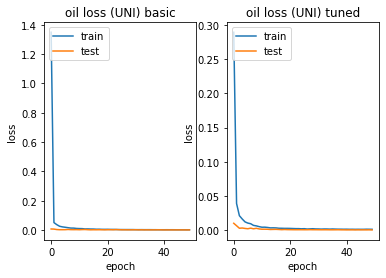

In [27]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_oil_basic_uni_whole.history['loss'])
plt.plot(history_tcn_oil_basic_uni_whole.history['val_loss'])
plt.title('oil loss (UNI) basic')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_oil_uni_tuned_whole.history['loss'])
plt.plot(history_tcn_oil_uni_tuned_whole.history['val_loss'])
plt.title('oil loss (UNI) tuned')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

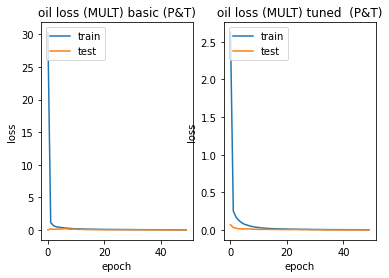

In [28]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_oil_mult_basic_whole.history['loss'])
plt.plot(history_tcn_oil_mult_basic_whole.history['val_loss'])
plt.title('oil loss (MULT) basic (P&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_oil_mult_tuned_whole.history['loss'])
plt.plot(history_tcn_oil_mult_tuned_whole.history['val_loss'])
plt.title('oil loss (MULT) tuned  (P&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

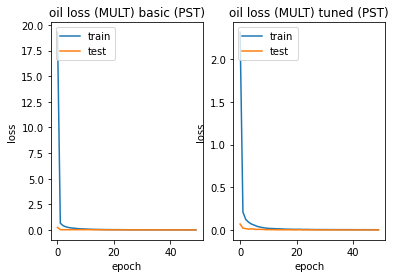

In [29]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_oil_mult_basic_whole_pst.history['loss'])
plt.plot(history_tcn_oil_mult_basic_whole_pst.history['val_loss'])
plt.title('oil loss (MULT) basic (PST)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_oil_mult_tuned_whole_pst.history['loss'])
plt.plot(history_tcn_oil_mult_tuned_whole_pst.history['val_loss'])
plt.title('oil loss (MULT) tuned (PST)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

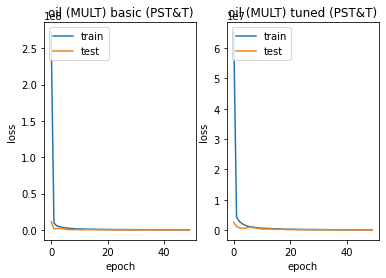

In [30]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_oil_mult_basic_whole_pstT.history['loss'])
plt.plot(history_tcn_oil_mult_basic_whole_pstT.history['val_loss'])
plt.title('oil (MULT) basic (PST&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_oil_mult_tuned_whole_pstT.history['loss'])
plt.plot(history_tcn_oil_mult_tuned_whole_pstT.history['val_loss'])
plt.title('oil (MULT) tuned (PST&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### visualization for test vs prediction

In [31]:
# making plotings for testing univariate models
## whole day training 
tcn_oil_basic_uni_whole_Y = y_uni_test.flatten()
tcn_oil_basic_uni_whole_Pred = tcn_oil_basic_uni_whole.predict(x_uni_test).flatten()
df_plot_tcn_oil_basic_uni_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_basic_uni_whole_Pred, tcn_oil_basic_uni_whole_Y]))))
df_plot_tcn_oil_basic_uni_whole['ds']=range(0,len(tcn_oil_basic_uni_whole_Y))
tcn_oil_uni_tuned_whole_Y = y_uni_test.flatten()
##-----
tcn_oil_uni_tuned_whole_Pred = tcn_oil_uni_tuned_whole.predict(x_uni_test).flatten()
df_plot_tcn_oil_uni_tuned_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_uni_tuned_whole_Pred, tcn_oil_uni_tuned_whole_Y]))))
df_plot_tcn_oil_uni_tuned_whole['ds']=range(0,len(tcn_oil_uni_tuned_whole_Y))
## daily training without padding 
tcn_oil_basic_uni_daily_Y = y_uni_test.flatten()
tcn_oil_basic_uni_daily_Pred = tcn_oil_basic_uni_daily.predict(x_uni_test).flatten()
df_plot_tcn_oil_basic_uni_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_basic_uni_daily_Pred, tcn_oil_basic_uni_daily_Y]))))
df_plot_tcn_oil_basic_uni_daily['ds']=range(0,len(tcn_oil_basic_uni_daily_Y))
tcn_oil_uni_tuned_daily_Y = y_uni_test.flatten()
##------------
tcn_oil_uni_tuned_daily_Pred = tcn_oil_uni_tuned_daily.predict(x_uni_test).flatten()
df_plot_tcn_oil_uni_tuned_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_uni_tuned_daily_Pred, tcn_oil_uni_tuned_daily_Y]))))
df_plot_tcn_oil_uni_tuned_daily['ds']=range(0,len(tcn_oil_uni_tuned_daily_Y))
## daily training with padding 
tcn_oil_basic_uni_daily_pd_Y = y_uni_test_pd.flatten()
tcn_oil_basic_uni_daily_pd_Pred = tcn_oil_basic_uni_daily_pd.predict(x_uni_test_pd).flatten()
df_plot_tcn_oil_basic_uni_daily_pd=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_basic_uni_daily_pd_Pred, tcn_oil_basic_uni_daily_pd_Y]))))
df_plot_tcn_oil_basic_uni_daily_pd['ds']=range(0,len(tcn_oil_basic_uni_daily_pd_Y))
##-----------
tcn_oil_uni_tuned_daily_pd_Y = y_uni_test_pd.flatten()
tcn_oil_uni_tuned_daily_pd_Pred = tcn_oil_uni_tuned_daily_pd.predict(x_uni_test_pd).flatten()
df_plot_tcn_oil_uni_tuned_daily_pd=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_uni_tuned_daily_pd_Pred, tcn_oil_uni_tuned_daily_pd_Y]))))
df_plot_tcn_oil_uni_tuned_daily_pd['ds']=range(0,len(tcn_oil_uni_tuned_daily_Y))

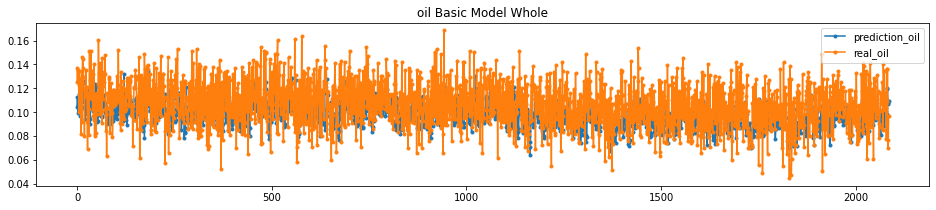

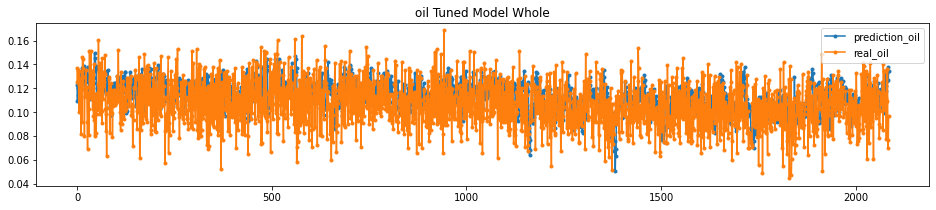

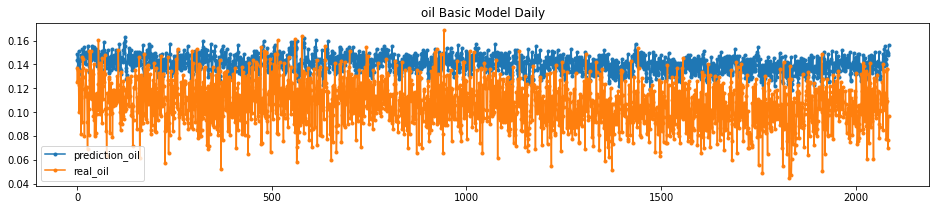

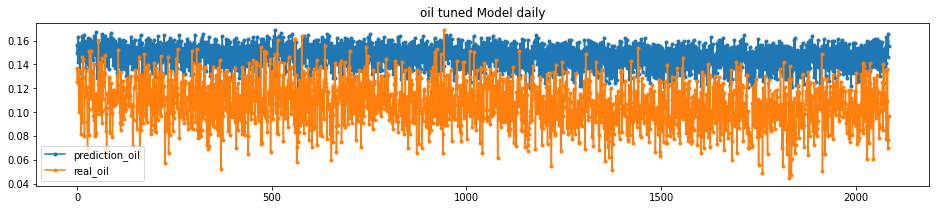

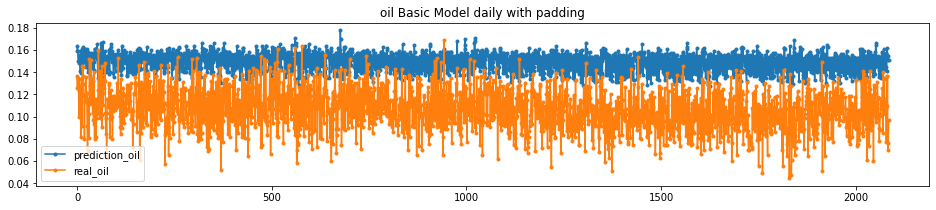

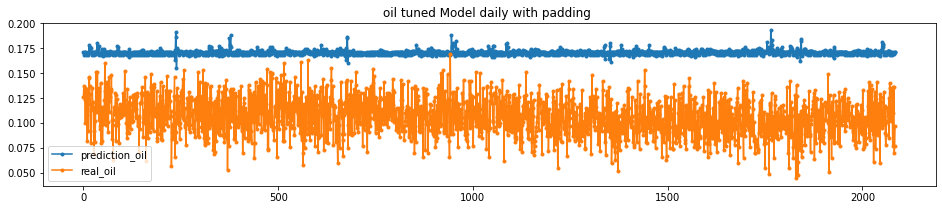

In [32]:
start = 0
end = len(df_plot_tcn_oil_uni_tuned_whole)
# whole basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Basic Model Whole')
ax.plot(df_plot_tcn_oil_basic_uni_whole['ds'].iloc[start:end], df_plot_tcn_oil_basic_uni_whole['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_basic_uni_whole['ds'].iloc[start:end], df_plot_tcn_oil_basic_uni_whole['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# whole tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Tuned Model Whole')
ax.plot(df_plot_tcn_oil_uni_tuned_whole['ds'].iloc[start:end], df_plot_tcn_oil_uni_tuned_whole['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_uni_tuned_whole['ds'].iloc[start:end], df_plot_tcn_oil_uni_tuned_whole['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# daily basic without padding
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Basic Model Daily')
ax.plot(df_plot_tcn_oil_basic_uni_daily['ds'].iloc[start:end], df_plot_tcn_oil_basic_uni_daily['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_basic_uni_daily['ds'].iloc[start:end], df_plot_tcn_oil_basic_uni_daily['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# daily tuned without padding
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil tuned Model daily')
ax.plot(df_plot_tcn_oil_uni_tuned_daily['ds'].iloc[start:end], df_plot_tcn_oil_uni_tuned_daily['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_uni_tuned_daily['ds'].iloc[start:end], df_plot_tcn_oil_uni_tuned_daily['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# daily basic with padding 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Basic Model daily with padding')
ax.plot(df_plot_tcn_oil_basic_uni_daily_pd['ds'].iloc[start:end], df_plot_tcn_oil_basic_uni_daily_pd['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_basic_uni_daily_pd['ds'].iloc[start:end], df_plot_tcn_oil_basic_uni_daily_pd['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# daily tuned with padding 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil tuned Model daily with padding ')
ax.plot(df_plot_tcn_oil_uni_tuned_daily_pd['ds'].iloc[start:end], df_plot_tcn_oil_uni_tuned_daily_pd['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_uni_tuned_daily_pd['ds'].iloc[start:end], df_plot_tcn_oil_uni_tuned_daily_pd['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()

In [33]:
# making plotings for testing multivariate models --- PART 1 
## whole day training 
tcn_oil_mult_basic_whole_Y = y_mult_test.flatten()
tcn_oil_mult_basic_whole_Pred = tcn_oil_mult_basic_whole.predict(x_mult_test).flatten()
df_plot_tcn_oil_mult_basic_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_mult_basic_whole_Pred, tcn_oil_mult_basic_whole_Y]))))
df_plot_tcn_oil_mult_basic_whole['ds']=range(0,len(tcn_oil_mult_basic_whole_Y))
##---------
tcn_oil_mult_tuned_whole_Y = y_mult_test.flatten()
tcn_oil_mult_tuned_whole_Pred = tcn_oil_mult_tuned_whole.predict(x_mult_test).flatten()
df_plot_tcn_oil_mult_tuned_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_mult_tuned_whole_Pred, tcn_oil_mult_tuned_whole_Y]))))
df_plot_tcn_oil_mult_tuned_whole['ds']=range(0,len(tcn_oil_mult_tuned_whole_Y))
##---------
tcn_oil_mult_basic_whole_pst_Y = y_mult_test_pst.flatten()
tcn_oil_mult_basic_whole_pst_Pred = tcn_oil_mult_basic_whole_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_oil_mult_basic_whole_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([tcn_oil_mult_basic_whole_pst_Pred, tcn_oil_mult_basic_whole_pst_Y]))))
df_plot_tcn_oil_mult_basic_whole_pst['ds']=range(0,len(tcn_oil_mult_basic_whole_pst_Y))
##------------
tcn_oil_mult_tuned_whole_pst_Y = y_mult_test_pst.flatten()
tcn_oil_mult_tuned_whole_pst_Pred = tcn_oil_mult_tuned_whole_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_oil_mult_tuned_whole_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_mult_tuned_whole_pst_Pred, tcn_oil_mult_tuned_whole_pst_Y]))))
df_plot_tcn_oil_mult_tuned_whole_pst['ds']=range(0,len(tcn_oil_mult_tuned_whole_pst_Y))
##------------ 
tcn_oil_mult_basic_whole_pstT_Y = y_mult_test_pstT.flatten()
tcn_oil_mult_basic_whole_pstT_Pred = tcn_oil_mult_basic_whole_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_oil_mult_basic_whole_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_mult_basic_whole_pstT_Pred, tcn_oil_mult_basic_whole_pstT_Y]))))
df_plot_tcn_oil_mult_basic_whole_pstT['ds']=range(0,len(tcn_oil_mult_basic_whole_pstT_Y))
##-----------
tcn_oil_mult_tuned_whole_pstT_Y = y_mult_test_pstT.flatten()
tcn_oil_mult_tuned_whole_pstT_Pred = tcn_oil_mult_tuned_whole_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_oil_mult_tuned_whole_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_mult_tuned_whole_pstT_Pred, tcn_oil_mult_tuned_whole_pstT_Y]))))
df_plot_tcn_oil_mult_tuned_whole_pstT['ds']=range(0,len(tcn_oil_mult_tuned_whole_pstT_Y))

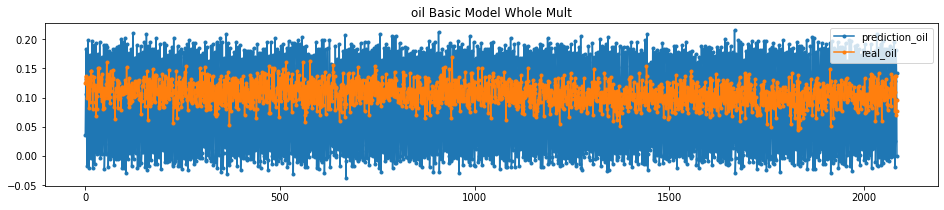

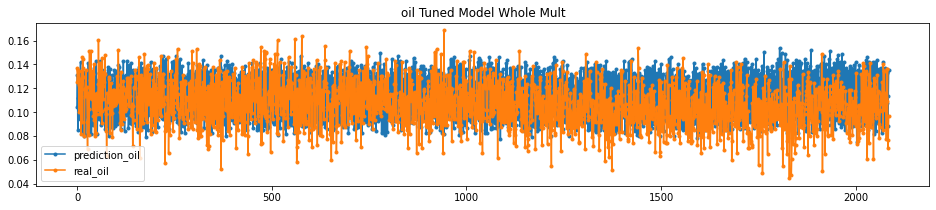

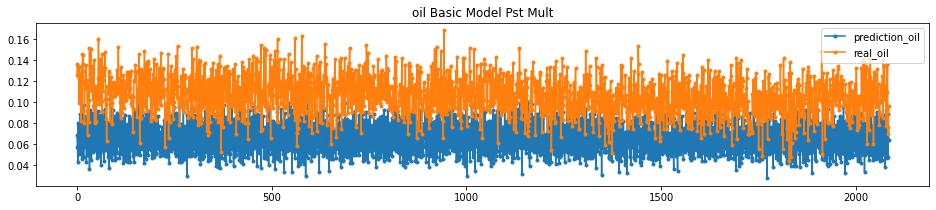

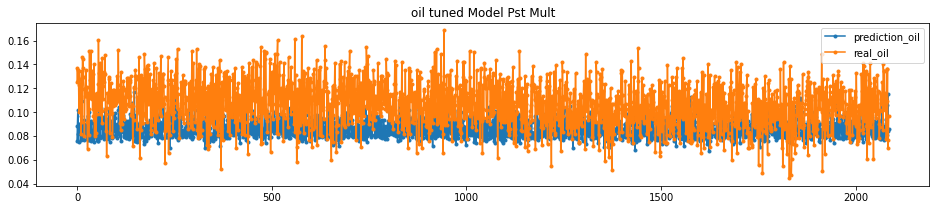

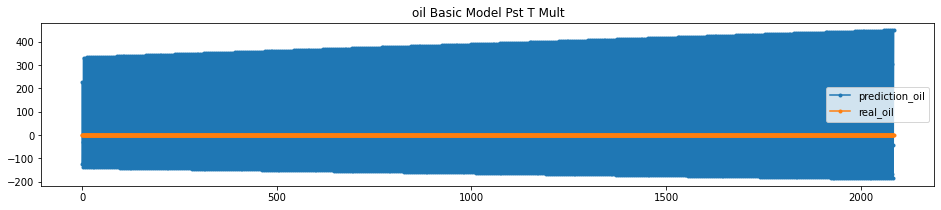

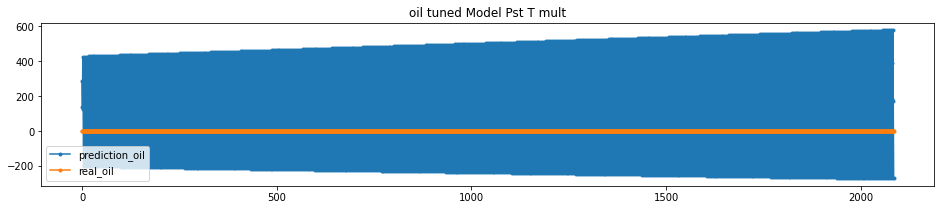

In [34]:
### whole multivariate training 
start = 0
end = len(df_plot_tcn_oil_uni_tuned_whole)
# whole basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Basic Model Whole Mult')
ax.plot(df_plot_tcn_oil_mult_basic_whole['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_whole['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_mult_basic_whole['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_whole['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# whole tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Tuned Model Whole Mult')
ax.plot(df_plot_tcn_oil_mult_tuned_whole['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_whole['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_mult_tuned_whole['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_whole['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# basic with past readings
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Basic Model Pst Mult')
ax.plot(df_plot_tcn_oil_mult_basic_whole_pst['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_whole_pst['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_mult_basic_whole_pst['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_whole_pst['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# tuned with past readings 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil tuned Model Pst Mult')
ax.plot(df_plot_tcn_oil_mult_tuned_whole_pst['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_whole_pst['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_mult_tuned_whole_pst['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_whole_pst['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# basic with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Basic Model Pst T Mult')
ax.plot(df_plot_tcn_oil_mult_basic_whole_pstT['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_whole_pstT['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_mult_basic_whole_pstT['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_whole_pstT['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# tuned with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil tuned Model Pst T mult')
ax.plot(df_plot_tcn_oil_mult_tuned_whole_pstT['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_whole_pstT['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_mult_tuned_whole_pstT['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_whole_pstT['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()

In [35]:
# making plotings for testing multivariate models --- PART 2 
## daily training 
tcn_oil_mult_basic_daily_Y = y_mult_test.flatten()
tcn_oil_mult_basic_daily_Pred = tcn_oil_mult_basic_daily.predict(x_mult_test).flatten()
df_plot_tcn_oil_mult_basic_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_mult_basic_daily_Pred, tcn_oil_mult_basic_daily_Y]))))
df_plot_tcn_oil_mult_basic_daily['ds']=range(0,len(tcn_oil_mult_basic_daily_Y))
##---------
tcn_oil_mult_tuned_daily_Y = y_mult_test.flatten()
tcn_oil_mult_tuned_daily_Pred = tcn_oil_mult_tuned_daily.predict(x_mult_test).flatten()
df_plot_tcn_oil_mult_tuned_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_mult_tuned_daily_Pred, tcn_oil_mult_tuned_daily_Y]))))
df_plot_tcn_oil_mult_tuned_daily['ds']=range(0,len(tcn_oil_mult_tuned_daily_Y))
##---------
tcn_oil_mult_basic_daily_pst_Y = y_mult_test_pst.flatten()
tcn_oil_mult_basic_daily_pst_Pred = tcn_oil_mult_basic_daily_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_oil_mult_basic_daily_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([tcn_oil_mult_basic_daily_pst_Pred, tcn_oil_mult_basic_daily_pst_Y]))))
df_plot_tcn_oil_mult_basic_daily_pst['ds']=range(0,len(tcn_oil_mult_basic_daily_pst_Y))
##------------
tcn_oil_mult_tuned_daily_pst_Y = y_mult_test_pst.flatten()
tcn_oil_mult_tuned_daily_pst_Pred = tcn_oil_mult_tuned_daily_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_oil_mult_tuned_daily_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_mult_tuned_daily_pst_Pred, tcn_oil_mult_tuned_daily_pst_Y]))))
df_plot_tcn_oil_mult_tuned_daily_pst['ds']=range(0,len(tcn_oil_mult_tuned_daily_pst_Y))
##------------ 
tcn_oil_mult_basic_daily_pstT_Y = y_mult_test_pstT.flatten()
tcn_oil_mult_basic_daily_pstT_Pred = tcn_oil_mult_basic_daily_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_oil_mult_basic_daily_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_mult_basic_daily_pstT_Pred, tcn_oil_mult_basic_daily_pstT_Y]))))
df_plot_tcn_oil_mult_basic_daily_pstT['ds']=range(0,len(tcn_oil_mult_basic_daily_pstT_Y))
##-----------
tcn_oil_mult_tuned_daily_pstT_Y = y_mult_test_pstT.flatten()
tcn_oil_mult_tuned_daily_pstT_Pred = tcn_oil_mult_tuned_daily_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_oil_mult_tuned_daily_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_oil_mult_tuned_daily_pstT_Pred, tcn_oil_mult_tuned_daily_pstT_Y]))))
df_plot_tcn_oil_mult_tuned_daily_pstT['ds']=range(0,len(tcn_oil_mult_tuned_daily_pstT_Y))

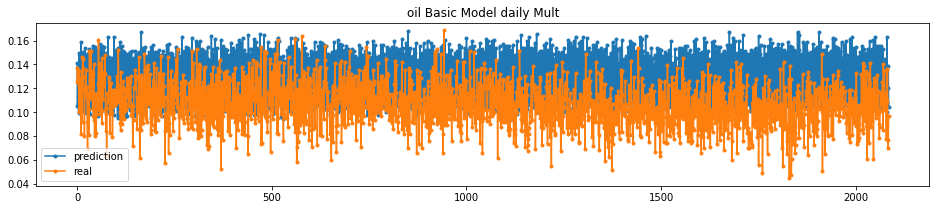

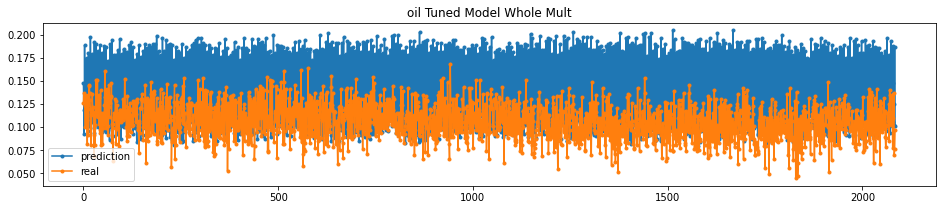

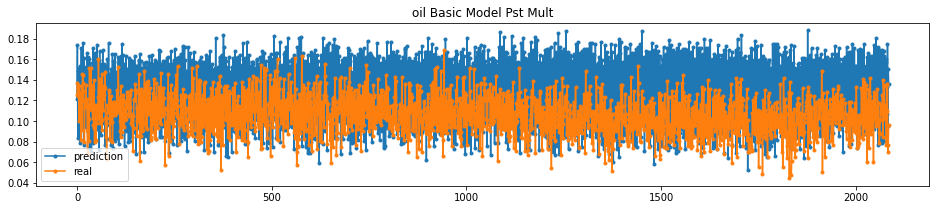

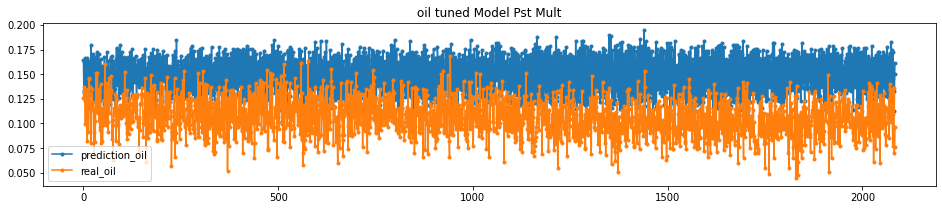

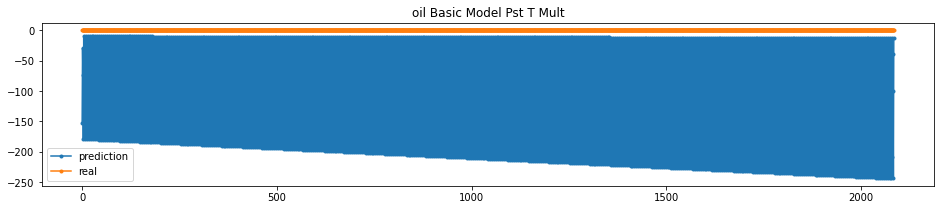

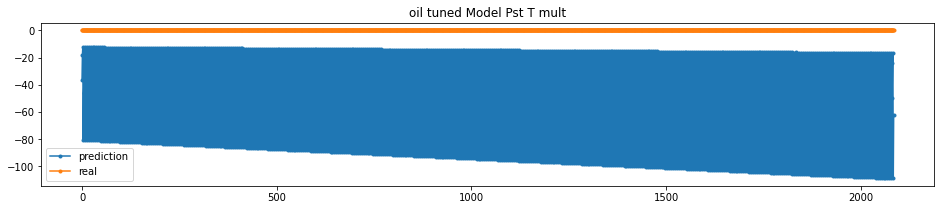

In [36]:
### daily without padding multivariate training 
start = 0
end = len(df_plot_tcn_oil_uni_tuned_whole)
# daily basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Basic Model daily Mult')
ax.plot(df_plot_tcn_oil_mult_basic_daily['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_daily['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_oil_mult_basic_daily['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_daily['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# daily tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Tuned Model Whole Mult')
ax.plot(df_plot_tcn_oil_mult_tuned_daily['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_daily['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_oil_mult_tuned_daily['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_daily['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# basic with past readings
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Basic Model Pst Mult')
ax.plot(df_plot_tcn_oil_mult_basic_daily_pst['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_daily_pst['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_oil_mult_basic_daily_pst['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_daily_pst['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# tuned with past readings 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil tuned Model Pst Mult')
ax.plot(df_plot_tcn_oil_mult_tuned_daily_pst['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_daily_pst['prediction'].iloc[start:end], marker=".", label='prediction_oil')
ax.plot(df_plot_tcn_oil_mult_tuned_daily_pst['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_daily_pst['real'].iloc[start:end], marker=".", label='real_oil')
ax.legend()
# basic with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil Basic Model Pst T Mult')
ax.plot(df_plot_tcn_oil_mult_basic_daily_pstT['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_daily_pstT['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_oil_mult_basic_daily_pstT['ds'].iloc[start:end], df_plot_tcn_oil_mult_basic_daily_pstT['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# tuned with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('oil tuned Model Pst T mult')
ax.plot(df_plot_tcn_oil_mult_tuned_daily_pstT['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_daily_pstT['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_oil_mult_tuned_daily_pstT['ds'].iloc[start:end], df_plot_tcn_oil_mult_tuned_daily_pstT['real'].iloc[start:end], marker=".", label='real')
ax.legend()